# <span style="color : #c0392b"> Problem Statement </span>
A US-based housing company named Surprise Housing has decided to enter the Australian market. <br>
The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. <br>
The company wants to know <br>

Which variables are significant in predicting the price of a house, and <br>
How well those variables describe the price of a house. <br>

In [1]:
# Let's import all the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# <span style="color : #c0392b"> Step 1: Reading and Understanding the Data </span>

In [2]:
# Model to predict the sales given the spend on marketing
os.chdir('/Users/arpit.saxena/Library/CloudStorage/OneDrive-ErulearningSolutionsPvtLtd/5 L&D/LJMU/04 ML2/02 Assignment Advanced Regression')
df = pd.read_csv('01 train.csv')
pd.set_option('display.max_columns', len(df.columns))
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
#Checking shape of the data
df.shape

(1460, 81)

## <span style="color : #f39c12"> Replacing NA with No [Variable_Name] </span>

There are multiple columns which contains NA that does not mean NaN but some value<br>
like Alley: Type of alley access to property<br>
       Grvl	Gravel<br>
       Pave	Paved<br>
       **NA 	No alley access**<br>
but python is reading that as NaN<br>
Need to convert them before checking info or dropping null values.<br>
<br>
Also, replacing GarageYrBlt with 0 as it is a continuous column and NA cannot be replaced/imputed with mean, meadian.

In [4]:
# Replacing NA with No Varible_Name
df['Alley'] = df['Alley'].replace(np.NaN, 'No alley access')
df['BsmtQual'] = df['BsmtQual'].replace(np.NaN, 'No Basement')
df['BsmtCond'] = df['BsmtCond'].replace(np.NaN, 'No Basement')
df['BsmtExposure'] = df['BsmtExposure'].replace(np.NaN, 'No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.NaN, 'No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.NaN, 'No Basement')
df['FireplaceQu'] = df['FireplaceQu'].replace(np.NaN, 'No Fireplace')
df['GarageType'] = df['GarageType'].replace(np.NaN, 'No Garage')
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.NaN, 0)
df['GarageFinish'] = df['GarageFinish'].replace(np.NaN, 'No Garage')
df['GarageQual'] = df['GarageQual'].replace(np.NaN, 'No Garage')
df['GarageCond'] = df['GarageCond'].replace(np.NaN, 'No Garage')
df['PoolQC'] = df['PoolQC'].replace(np.NaN, 'No Pool')
df['Fence'] = df['Fence'].replace(np.NaN, 'No Fence')
df['MiscFeature'] = df['MiscFeature'].replace(np.NaN, 'No Misc')

## <span style="color : #f39c12"> Correcting column types </span>

In [5]:
#Checking non-null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking dtypes distribution among 81 columns
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

Few columns are dicrete in nature and is represented by numbers. <br>
Converting them to categorical.

In [7]:
# Converting column type for categorical variable from numeric to object
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['BsmtFullBath'] = df['BsmtFullBath'].astype('object')
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype('object')
df['FullBath'] = df['FullBath'].astype('object')
df['HalfBath'] = df['HalfBath'].astype('object')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('object')
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype('object')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')
df['GarageCars'] = df['GarageCars'].astype('object')

In [8]:
#Checking non-null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [9]:
# Checking dtypes distribution among 81 columns
df.dtypes.value_counts()

object     54
int64      24
float64     3
dtype: int64

In [10]:
# Checking percnetage of null values in columns where there is atleast 1 null value
round(df.isnull().sum()[df.isnull().sum() > 0]*100/df.shape[0], 2)

LotFrontage    17.74
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

1. Id column is index and can be dropped<br>
2. MasVnrType, MasVnrArea, Electrical contains less than 0.55% null values.<br>
3. LotFrontage contains 17.74% null values.
We will drop these rows during missing value treatment step.

In [11]:
# Dropping Id Column
df.drop('Id', axis = 1, inplace = True)

In [12]:
# Checking shape post dropping Id column
df.shape

(1460, 80)

# <span style="color : #c0392b"> Step 2: Exploratory Data Analysis</span><br>
Let's now spend some time doing what is arguably the most important step - **visualizing the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's identification of predictors have a strong association with the outcome variable will be made, if any.

We'll visualise our data using `matplotlib` and `seaborn`.

# <span style="color : #c0392b">Univariate Analysis</span>

## <span style="color : #f39c12">Univariate analysis of all variables</span>

In [13]:
# Checking Unique Values to drop column in case any column has 0% nunique values and hence not contributing.
pd.set_option('display.max_rows', 500)
unique_values_1 = []
unique_values_2 = []
unique_values_3 = []
for k in df.columns:
    unique_values_1.append(k)
    unique_values_2.append(df[k].nunique())
    unique_values_3.append(round(df[k].nunique()*100/df.shape[0], 2))
unique_values = pd.concat([pd.DataFrame(unique_values_1, columns = ['Variables']), 
          pd.DataFrame(unique_values_2, columns = ['Unique Values']), 
          pd.DataFrame(unique_values_3, columns = ['Percent_Unique_Values'])], axis = 1)
unique_values

Variables  Unique Values  Percent_Unique_Values
0      MSSubClass             15                   1.03
1        MSZoning              5                   0.34
2     LotFrontage            110                   7.53
3         LotArea           1073                  73.49
4          Street              2                   0.14
5           Alley              3                   0.21
6        LotShape              4                   0.27
7     LandContour              4                   0.27
8       Utilities              2                   0.14
9       LotConfig              5                   0.34
10      LandSlope              3                   0.21
11   Neighborhood             25                   1.71
12     Condition1              9                   0.62
13     Condition2              8                   0.55
14       BldgType              5                   0.34
15     HouseStyle              8                   0.55
16    OverallQual             10                   0.68
17    OverallCond              9                   0.62
18      YearBuilt            112                   7.67
19   YearRemodAdd             61                   4.18
20      RoofStyle              6                   0.41
21       RoofMatl              8                   0.55
22    Exterior1st             15                   1.03
23    Exterior2nd             16                   1.10
24     MasVnrType              4                   0.27
25     MasVnrArea            327                  22.40
26      ExterQual              4                   0.27
27      ExterCond              5                   0.34
28     Foundation              6                   0.41
29       BsmtQual              5                   0.34
30       BsmtCond              5                   0.34
31   BsmtExposure              5                   0.34
32   BsmtFinType1              7                   0.48
33     BsmtFinSF1            637                  43.63
34   BsmtFinType2              7                   0.48
35     BsmtFinSF2            144                   9.86
36      BsmtUnfSF            780                  53.42
37    TotalBsmtSF            721                  49.38
38        Heating              6                   0.41
39      HeatingQC              5                   0.34
40     CentralAir              2                   0.14
41     Electrical              5                   0.34
42       1stFlrSF            753                  51.58
43       2ndFlrSF            417                  28.56
44   LowQualFinSF             24                   1.64
45      GrLivArea            861                  58.97
46   BsmtFullBath              4                   0.27
47   BsmtHalfBath              3                   0.21
48       FullBath              4                   0.27
49       HalfBath              3                   0.21
50   BedroomAbvGr              8                   0.55
51   KitchenAbvGr              4                   0.27
52    KitchenQual              4                   0.27
53   TotRmsAbvGrd             12                   0.82
54     Functional              7                   0.48
55     Fireplaces              4                   0.27
56    FireplaceQu              6                   0.41
57     GarageType              7                   0.48
58    GarageYrBlt             98                   6.71
59   GarageFinish              4                   0.27
60     GarageCars              5                   0.34
61     GarageArea            441                  30.21
62     GarageQual              6                   0.41
63     GarageCond              6                   0.41
64     PavedDrive              3                   0.21
65     WoodDeckSF            274                  18.77
66    OpenPorchSF            202                  13.84
67  EnclosedPorch            120                   8.22
68      3SsnPorch             20                   1.37
69    ScreenPorch             76                   5.21
70       PoolArea              8

There is no column which has only 1 unique value. No column can be dropped.

In [14]:
# Dividing dataset into categorical(nominal) and continuous data
df_categorical = df.select_dtypes(['object'])
df_continuous = df[list(df._get_numeric_data().columns)]

In [15]:
unique_values_categorical = unique_values[unique_values['Variables'].isin(df_categorical.columns)]

In [16]:
unique_values_categorical.reset_index(drop = True)

Variables  Unique Values  Percent_Unique_Values
0        MSZoning              5                   0.34
1          Street              2                   0.14
2           Alley              3                   0.21
3        LotShape              4                   0.27
4     LandContour              4                   0.27
5       Utilities              2                   0.14
6       LotConfig              5                   0.34
7       LandSlope              3                   0.21
8    Neighborhood             25                   1.71
9      Condition1              9                   0.62
10     Condition2              8                   0.55
11       BldgType              5                   0.34
12     HouseStyle              8                   0.55
13    OverallQual             10                   0.68
14    OverallCond              9                   0.62
15      RoofStyle              6                   0.41
16       RoofMatl              8                   0.55
17    Exterior1st             15                   1.03
18    Exterior2nd             16                   1.10
19     MasVnrType              4                   0.27
20      ExterQual              4                   0.27
21      ExterCond              5                   0.34
22     Foundation              6                   0.41
23       BsmtQual              5                   0.34
24       BsmtCond              5                   0.34
25   BsmtExposure              5                   0.34
26   BsmtFinType1              7                   0.48
27   BsmtFinType2              7                   0.48
28        Heating              6                   0.41
29      HeatingQC              5                   0.34
30     CentralAir              2                   0.14
31     Electrical              5                   0.34
32   BsmtFullBath              4                   0.27
33   BsmtHalfBath              3                   0.21
34       FullBath              4                   0.27
35       HalfBath              3                   0.21
36   BedroomAbvGr              8                   0.55
37   KitchenAbvGr              4                   0.27
38    KitchenQual              4                   0.27
39   TotRmsAbvGrd             12                   0.82
40     Functional              7                   0.48
41     Fireplaces              4                   0.27
42    FireplaceQu              6                   0.41
43     GarageType              7                   0.48
44   GarageFinish              4                   0.27
45     GarageCars              5                   0.34
46     GarageQual              6                   0.41
47     GarageCond              6                   0.41
48     PavedDrive              3                   0.21
49         PoolQC              4                   0.27
50          Fence              5                   0.34
51    MiscFeature              5                   0.34
52       SaleType              9                   0.62
53  SaleCondition              6                   0.41

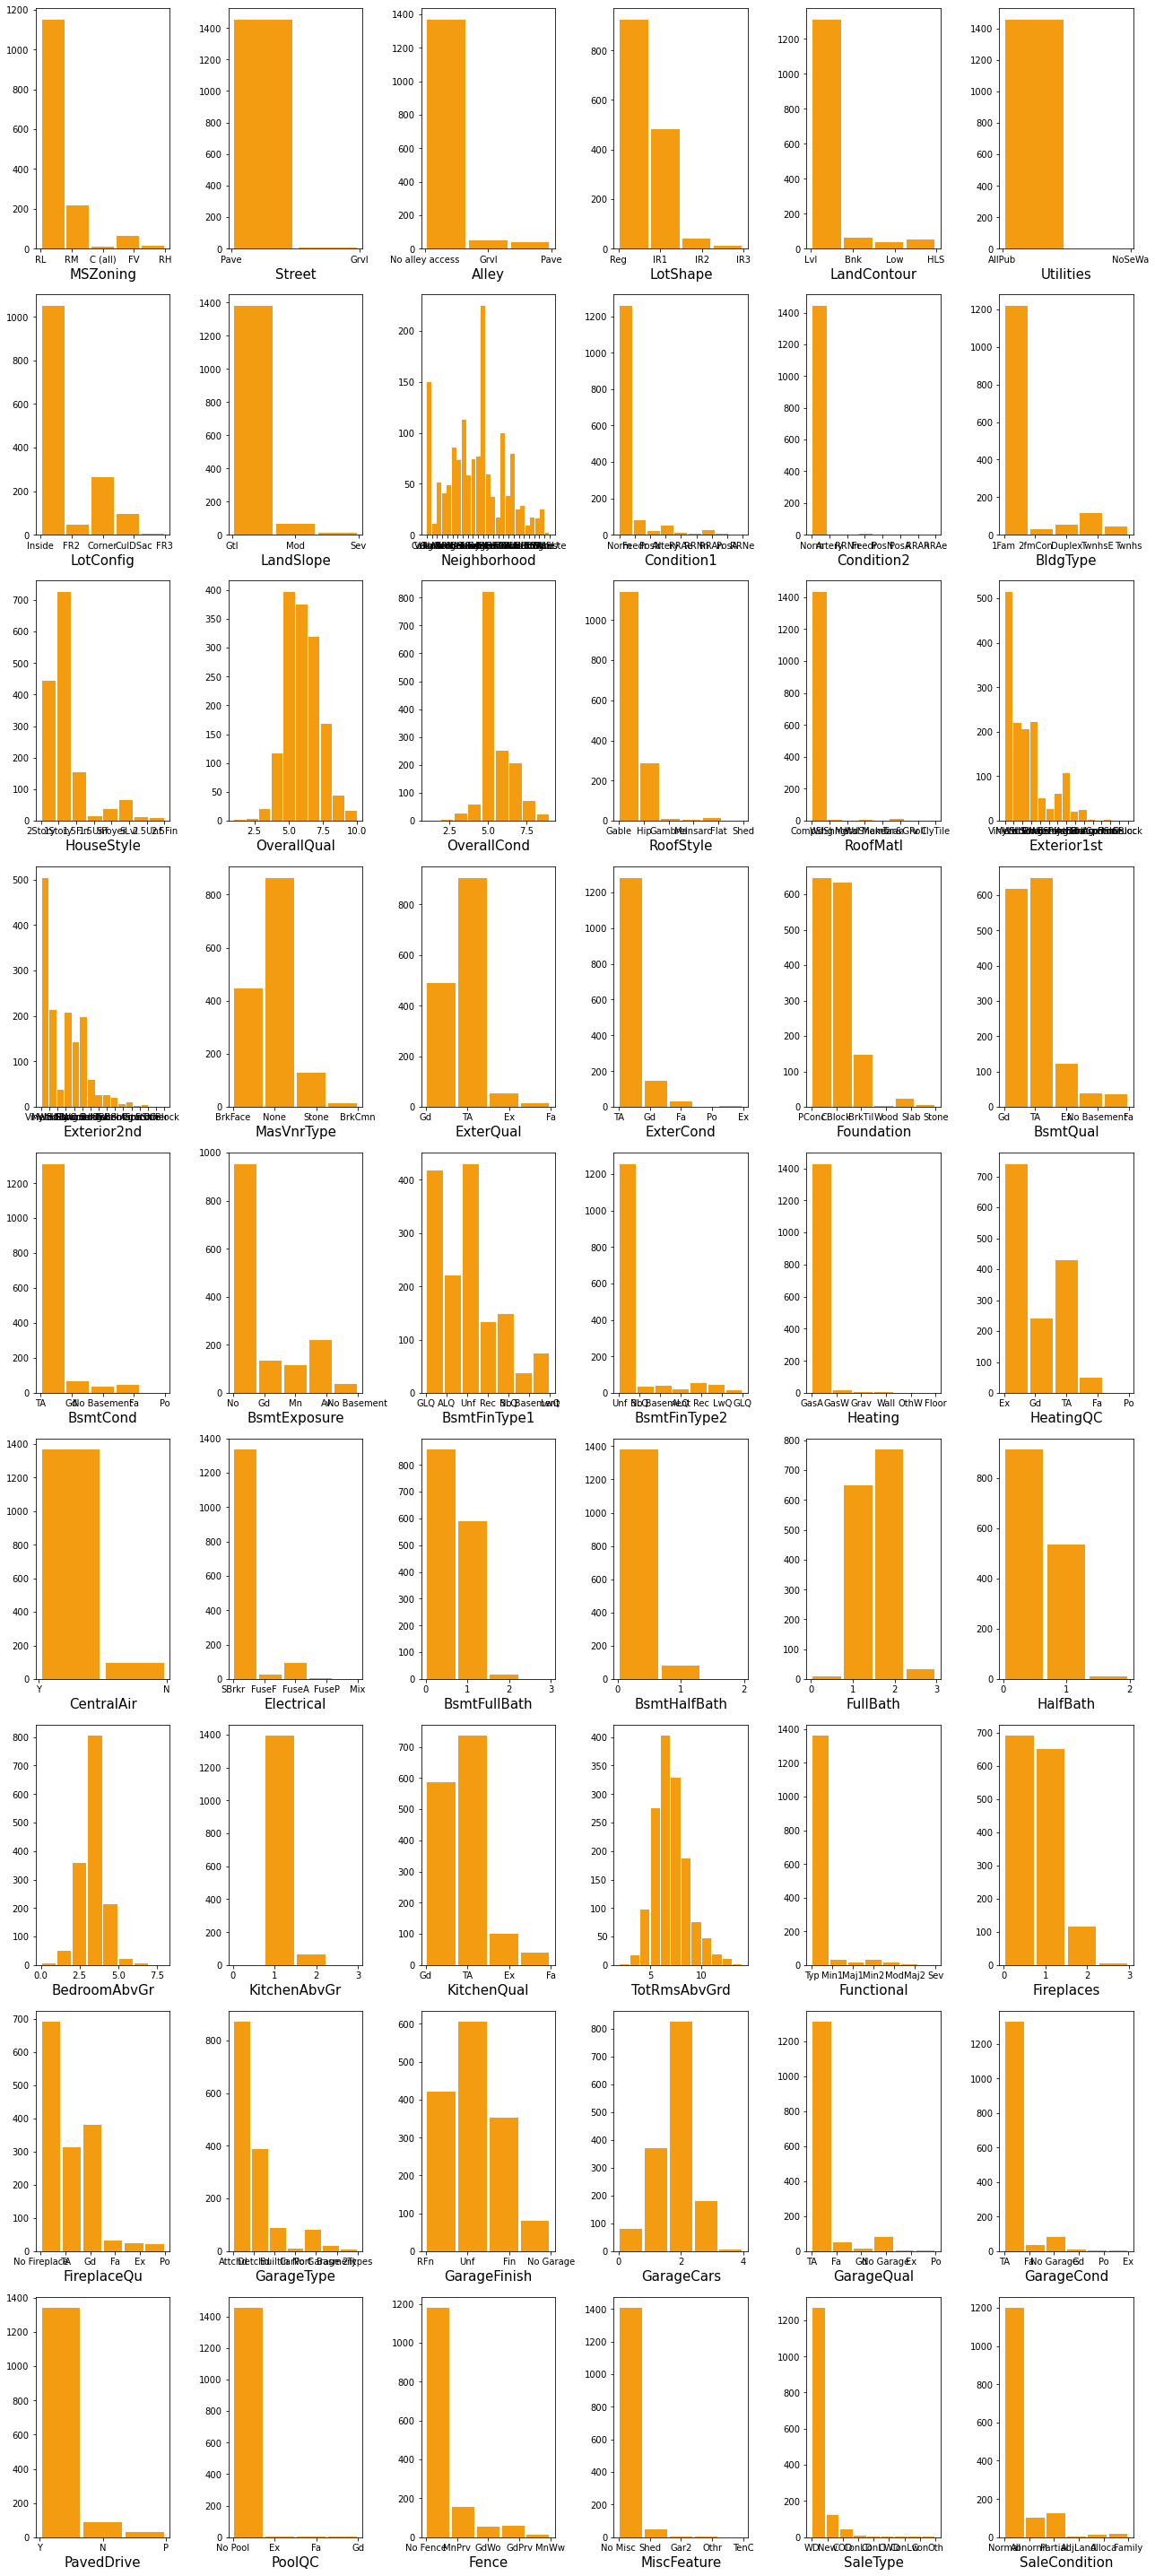

In [17]:
# Plotting histogram of categorical variable to understand the frequency distribution
count = 0
fig, ax = plt.subplots(9, 6, figsize = (18, 40), sharex = False, sharey = False)
for i in range(54):
    plt.subplot(9, 6, count + 1)
    plt.hist(df_categorical.iloc[:, i].dropna(axis = 0), bins = unique_values_categorical.iloc[i, 1], rwidth = 0.9, color = '#f39c12')
    plt.xlabel(df_categorical.columns[i], fontsize = 15)
    count += 1
plt.tight_layout()
plt.show()

### <span style="color : #16a085">Insights</span>
1. Most of the variables are skewed except for OverallQual and TotRmsAbvGrd <br>
2. Many variables are dominate dby a single level, e.g., 'Street', 'Alley', 'LandContour', 'Utilities',
'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir',
 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
 'MiscFeature', 'SaleType'

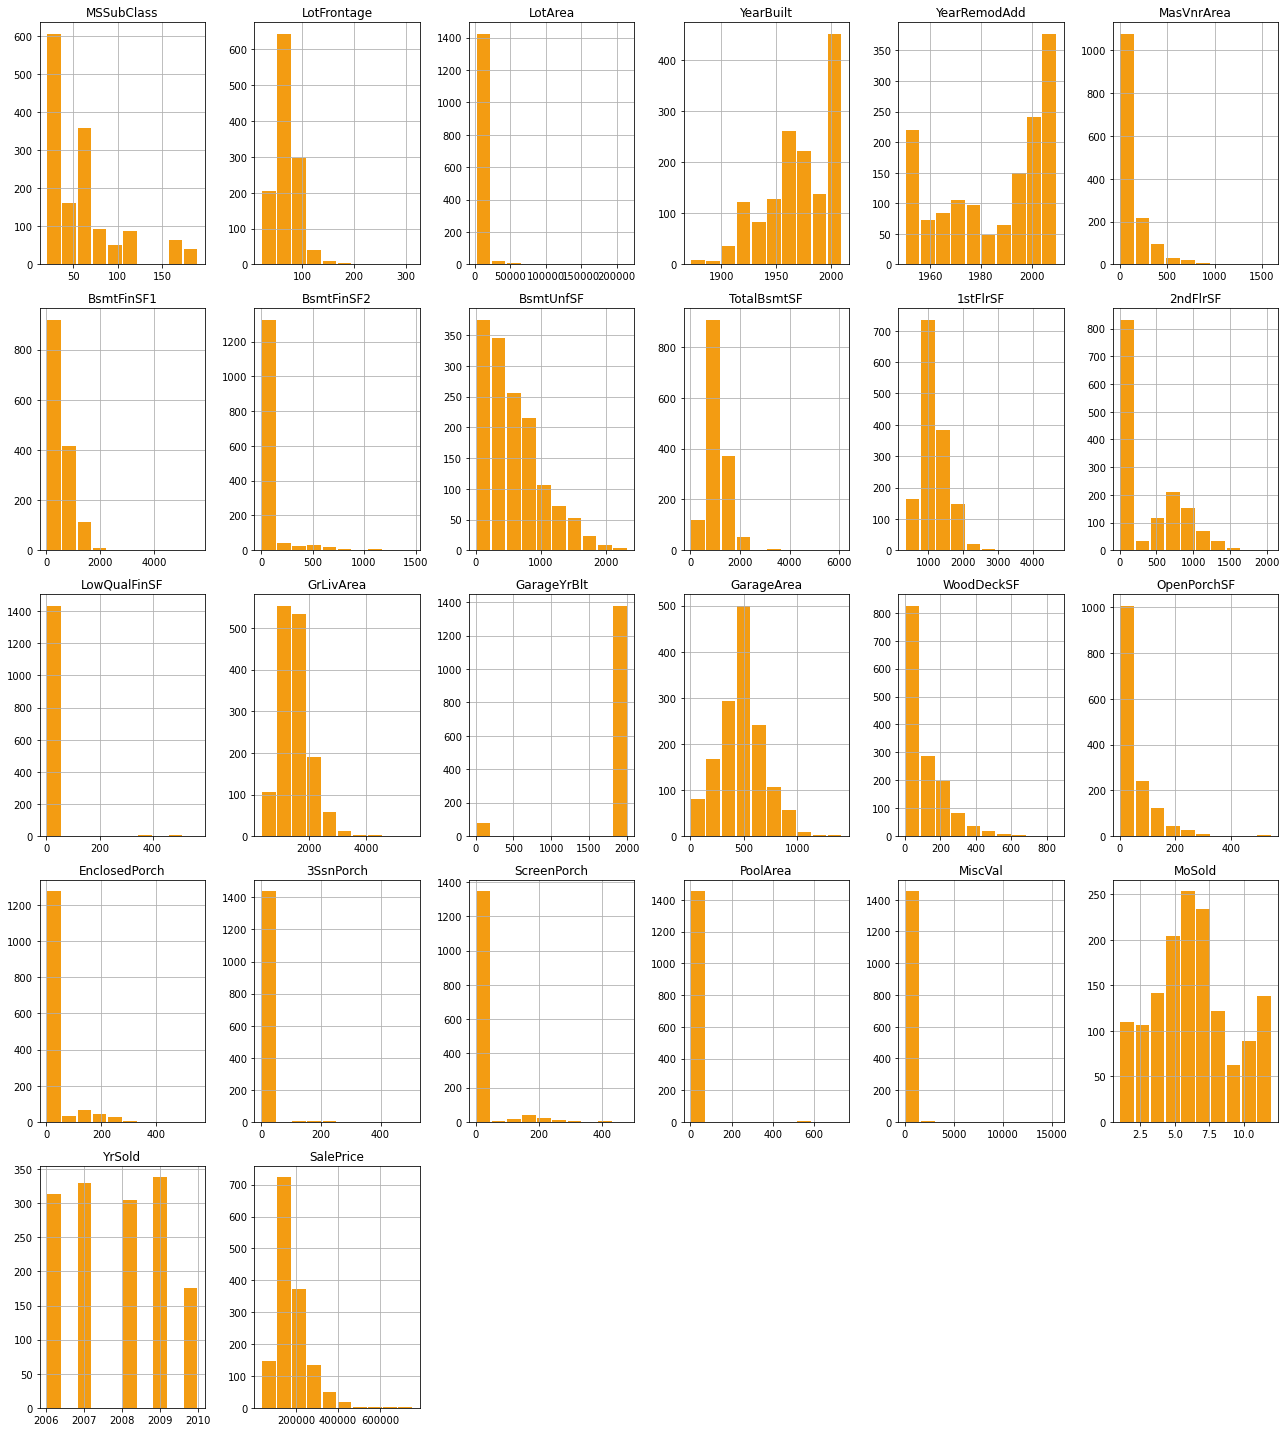

In [18]:
# Plotting histogram of continuous variable to undeerstand the frequency distribution
df_continuous.hist(figsize = (18, 20), layout = (5, 6), sharex = False, sharey = False, rwidth = 0.9, color = '#f39c12')
plt.tight_layout()
plt.show()

### <span style="color : #16a085">Insights</span>
1. All variables are skewed. <br>
2. Many variables are dominate dby a single level, e.g., 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'

## <span style="color : #f39c12">Missing Value Treatment</span>

In [19]:
# Checking columns with missing values > 0
pd.concat([pd.DataFrame(df.isna().sum()[df.isna().sum() > 0], columns = ['Missing Values Count']), 
           pd.DataFrame(round(df.isnull().sum()[df.isnull().sum() > 0]*100/df.shape[0], 2), columns = ['Missing Values Percent'])], 
          axis = 1)

Missing Values Count  Missing Values Percent
LotFrontage                   259                   17.74
MasVnrType                      8                    0.55
MasVnrArea                      8                    0.55
Electrical                      1                    0.07

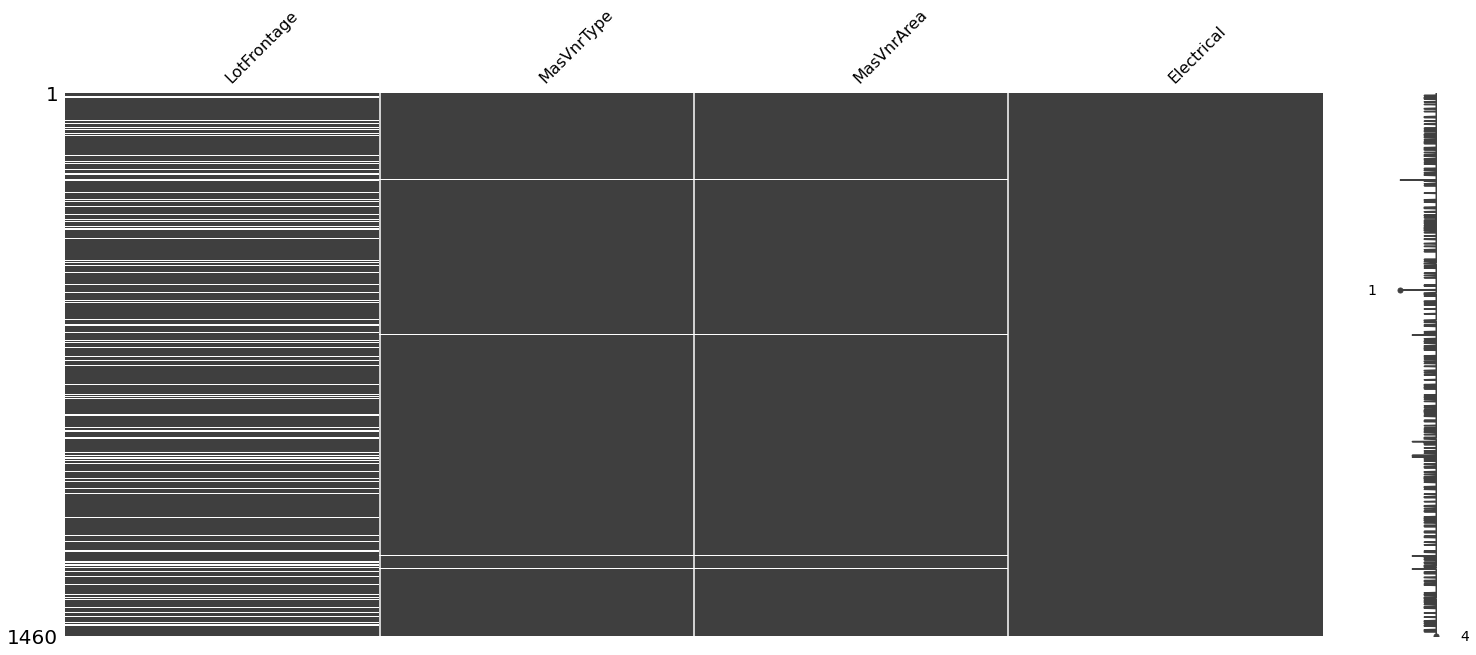

In [20]:
# Visualizing Missing Values where missing values > 0
msno.matrix(df[df.columns[df.isna().sum() > 0]])
plt.show()

Lets impute these columns.

When the data is skewed, it is good to consider using the median value for replacing the missing values.<br>
As LotFrontage, MasVnrArea are left skewed, going for median imputataion. <br>
Rest all columns are categorical, hence going for mode imputation.

In [21]:
# Imputing missing values
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median()) #Left Skewed
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median()) #Left Skewed
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [22]:
# Checking columns with missing values > 0 post imputation
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

There are no longer any missing value.

## <span style="color : #f39c12"> Checking Duplicate Rows </span>

In [23]:
# Checking duplicate rows, if any
df[df.duplicated()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

There are no duplicate rows to drop.

## <span style="color : #f39c12"> Checking Mixed Types in any column </span>

In [24]:
from pandas.api.types import infer_dtype

In [25]:
for i in df.columns:
    print(infer_dtype(df[i]))

integer
string
floating
integer
string
string
string
string
string
string
string
string
string
string
string
string
integer
integer
integer
integer
string
string
string
string
string
floating
string
string
string
string
string
string
string
integer
string
integer
integer
integer
string
string
string
string
integer
integer
integer
integer
integer
integer
integer
integer
integer
integer
string
integer
string
integer
string
string
floating
string
integer
integer
string
string
string
integer
integer
integer
integer
integer
integer
string
string
string
integer
integer
integer
string
string
integer


There are no column with mixed dtypes.

## <span style="color : #f39c12"> Creating Derived Columns </span>

In [26]:
# Create a new column named IsRemodelled - 
# This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['IsRemodelled'] = df.apply(checkForRemodel, axis = 1)  

In [27]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['BuiltOrRemodelAge'] = df.apply(getBuiltOrRemodelAge, axis = 1)

In [28]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df['OldOrNewGarage'] = df['GarageYrBlt'].apply(getGarageConstructionPeriod)

In [29]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, 
# we can drop these columns as we would only be using the derived columns for further analysis
df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [30]:
# Shape of data
df.shape

(1460, 79)

## <span style="color : #f39c12">Remove categorical attributes that have more than 85% data associated to one value</span>

Lets remove any column that has one value repeating 1241 times (1241/1460)*100 = 85%) as this column would be skewed to one value

In [31]:
# Fetching the updated categorical and continuous columns from data post missing value imputataion
df_categorical_2 = df.select_dtypes(include = ['object'])
df_continuous_2 = df.select_dtypes(include = ['int64', 'float'])

In [32]:
# Remove categorical attributes that have more than 85% data associated to one value.
def SignificantLevelCount():
    SLC_Cat = []
    for col in (df_categorical_2):
        if(df[col].value_counts().max() >= 1241):
            SLC_Cat.append(col)
    return SLC_Cat

SLC_Cat_Columns = SignificantLevelCount()

In [33]:
# Dropping these columns as one level of them contributes more than 85%
SLC_Cat_Columns

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType']

In [34]:
# Remove the columns with skewed data
df.drop(SLC_Cat_Columns, axis = 1, inplace = True)
print("Shape: ", df.shape)
df.head()

Shape:  (1460, 56)


MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle OverallQual OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story           7           5     Gable     VinylSd   
1     1Fam     1Story           6           8     Gable     MetalSd   
2     1Fam     2Story           7           5     Gable     VinylSd   
3     1Fam     2Story           7           5     Gable     Wd Sdng   
4     1Fam     2Story           8           5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           No          GLQ         706           0        150          856   
1           Gd          ALQ         978           0        284         1262   
2           Mn          GLQ         486           0        434          920   
3           No          ALQ         216           0        540          756   
4           Av          GLQ         655           0        490         1145   

  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea BsmtFullBath  \
0        Ex       856       854             0       1710            1   
1        Ex      1262         0             0       1262            0   
2        Ex       920       866             0       1786            1   
3        Gd       961       756             0       1717            1   
4        Ex      1145      1053             0       2198            1   

  FullBath HalfBath BedroomAbvGr KitchenQual TotRmsAbvGrd Fireplaces  \
0        2        1            3          Gd            8          0   
1        2        0            3          TA            6          1   
2        2        1            3          Gd            6          1   
3        1        0            3          Gd            7          1   
4        2        1            4          Gd            9          1   

    FireplaceQu GarageType GarageFinish GarageCars  GarageArea  WoodDeckSF  \
0  No Fireplace     Attchd          RFn          2         548           0   
1            TA     Attchd          RFn          2         460         298   
2            TA     Attchd          RFn          2         608           0   
3            Gd     Detchd          Unf          3         642           0   
4            TA     Attchd          RFn          3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea     Fence  \
0           61              0          0            0         0  No Fence   
1            0              0          0            0         0  No Fence   
2           42              0          0            0         0  No Fence   
3           35            272          0            0         0  No Fence   
4           84              0          0            0         0  No Fence   

   MiscVal  MoSold SaleCondition  SalePrice  IsRemodelled  BuiltOrRemodelAge  \
0        0       2        Normal     208500             0                  5   
1        0       5        Normal     181500             0                 31   
2        0       9        Normal     223500             1                  6   
3        0       2       Abnorml     140000             1                 3

## <span style="color : #f39c12">Remove numerical attributes that have more than 85% data associated to one value</span>

Lets remove any column that has one value repeating 1241 times (1241/1460)*100 = 85%) as this column would be skewed to one value

In [35]:
# Remove continuous attributes that have more than 85% data associated to one value.
def SignificantLevelCount():
    SLC_Con = []
    for col in (df_continuous_2):
        if(df[col].value_counts().max() >= 1241):
            SLC_Con.append(col)
    return SLC_Con

SLC_Con_Columns = SignificantLevelCount()

In [36]:
# Dropping these columns as one level of them contributes more than 85%
SLC_Con_Columns

['BsmtFinSF2',
 'LowQualFinSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [37]:
# Remove the columns with skewed data
df.drop(SLC_Con_Columns, axis = 1, inplace = True)
print("Shape: ", df.shape)
df.head()

Shape:  (1460, 49)


MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle OverallQual OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story           7           5     Gable     VinylSd   
1     1Fam     1Story           6           8     Gable     MetalSd   
2     1Fam     2Story           7           5     Gable     VinylSd   
3     1Fam     2Story           7           5     Gable     Wd Sdng   
4     1Fam     2Story           8           5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0           No          GLQ         706        150          856        Ex   
1           Gd          ALQ         978        284         1262        Ex   
2           Mn          GLQ         486        434          920        Ex   
3           No          ALQ         216        540          756        Gd   
4           Av          GLQ         655        490         1145        Ex   

   1stFlrSF  2ndFlrSF  GrLivArea BsmtFullBath FullBath HalfBath BedroomAbvGr  \
0       856       854       1710            1        2        1            3   
1      1262         0       1262            0        2        0            3   
2       920       866       1786            1        2        1            3   
3       961       756       1717            1        1        0            3   
4      1145      1053       2198            1        2        1            4   

  KitchenQual TotRmsAbvGrd Fireplaces   FireplaceQu GarageType GarageFinish  \
0          Gd            8          0  No Fireplace     Attchd          RFn   
1          TA            6          1            TA     Attchd          RFn   
2          Gd            6          1            TA     Attchd          RFn   
3          Gd            7          1            Gd     Detchd          Unf   
4          Gd            9          1            TA     Attchd          RFn   

  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF     Fence  MoSold  \
0          2         548           0           61  No Fence       2   
1          2         460         298            0  No Fence       5   
2          2         608           0           42  No Fence       9   
3          3         642           0           35  No Fence       2   
4          3         836         192           84  No Fence      12   

  SaleCondition  SalePrice  IsRemodelled  BuiltOrRemodelAge  OldOrNewGarage  
0        Normal     208500             0                  5               1  
1        Normal     181500             0                 31               0  
2        Normal     223500             1                  6               1  
3       Abnorml     140000             1                 36               0  
4        Normal     250000             0                  8               1

## <span style="color : #f39c12">Outlier Detection</span>

In [38]:
# Checking dtypes distribution among 50 columns
df.dtypes.value_counts()

object     31
int64      16
float64     2
dtype: int64

In [39]:
# Fetching the updated categorical and continuous columns from data post missing value imputataion
df_categorical_3 = df.select_dtypes(include = ['object'])
df_continuous_3 = df.select_dtypes(include = ['int64', 'float'])

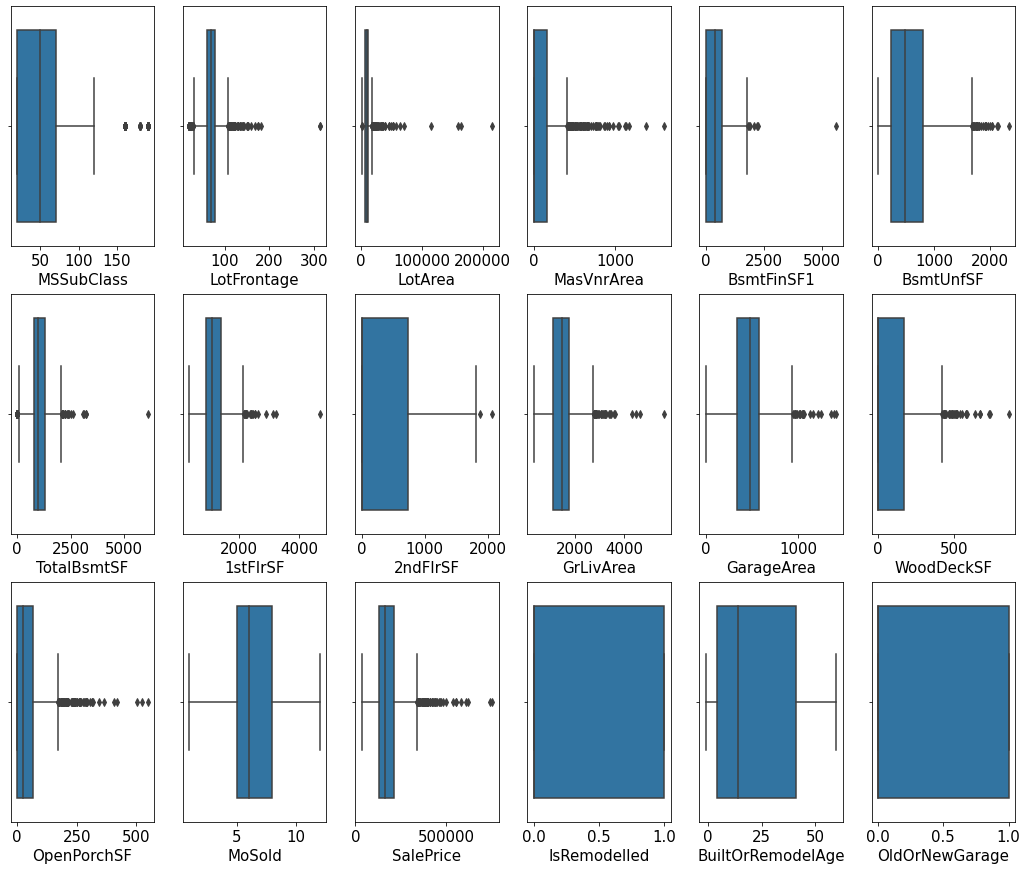

In [40]:
# Checking outliers in all continuous columns
count = 0
fig, ax = plt.subplots(3, 6, figsize = (18, 15), sharex = False, sharey = False)
for j in range(18):
    plt.subplot(3, 6, count + 1)
    b = sns.boxplot(x = df_continuous_3.iloc[:, j])
    b.set_xlabel(df_continuous_3.columns[j], fontsize = 15)
    b.tick_params(labelsize = 15)
    count += 1
plt.show()

### <span style="color : #16a085">Insights</span>
1. Only 4 variables do not have outliers.

In [41]:
# Calculating Quantiles
Q1 = df_continuous_3.quantile(0.25)
Q3 = df_continuous_3.quantile(0.75)
IQR = Q3 - Q1

In [42]:
# Counting number of outliers in continuous columns
( (df_continuous_3 < (Q1 - 1.5*IQR)) | (df_continuous_3 > (Q3 + 1.5*IQR)) ).sum()

MSSubClass           103
LotFrontage          106
LotArea               69
MasVnrArea            98
BsmtFinSF1             7
BsmtUnfSF             29
TotalBsmtSF           61
1stFlrSF              20
2ndFlrSF               2
GrLivArea             31
GarageArea            21
WoodDeckSF            32
OpenPorchSF           77
MoSold                 0
SalePrice             61
IsRemodelled           0
BuiltOrRemodelAge      0
OldOrNewGarage         0
dtype: int64

## <span style="color : #f39c12">Removing Outlier from the dataset</span>

In [43]:
for (i, j) in zip(df_continuous_3.columns, range(len(df_continuous_3.columns))):
    df = df[~( (df[i] < (Q1 - 1.5*IQR)[j]) | (df[i] >  (Q3 + 1.5*IQR)[j]) )]

In [44]:
# Shape of data post outlier removal
print("Shape: ", df.shape)
print("Rows Dropped :", 1460 - df.shape[0])
print("Data Retained: ", str(round(df.shape[0]*100/1460, 2)) + "%")

Shape:  (1020, 49)
Rows Dropped : 440
Data Retained:  69.86%


# <span style="color : #c0392b">Bivariate Analysis</span>

## <span style="color : #f39c12">Continuous - Continuous Bivariate Analysis</span>

In [45]:
# Fetching the updated categorical and continuous columns from data post missing value imputataion
df_categorical_4 = df.select_dtypes(include = ['object'])
df_continuous_4 = df.select_dtypes(include = ['int64', 'float'])

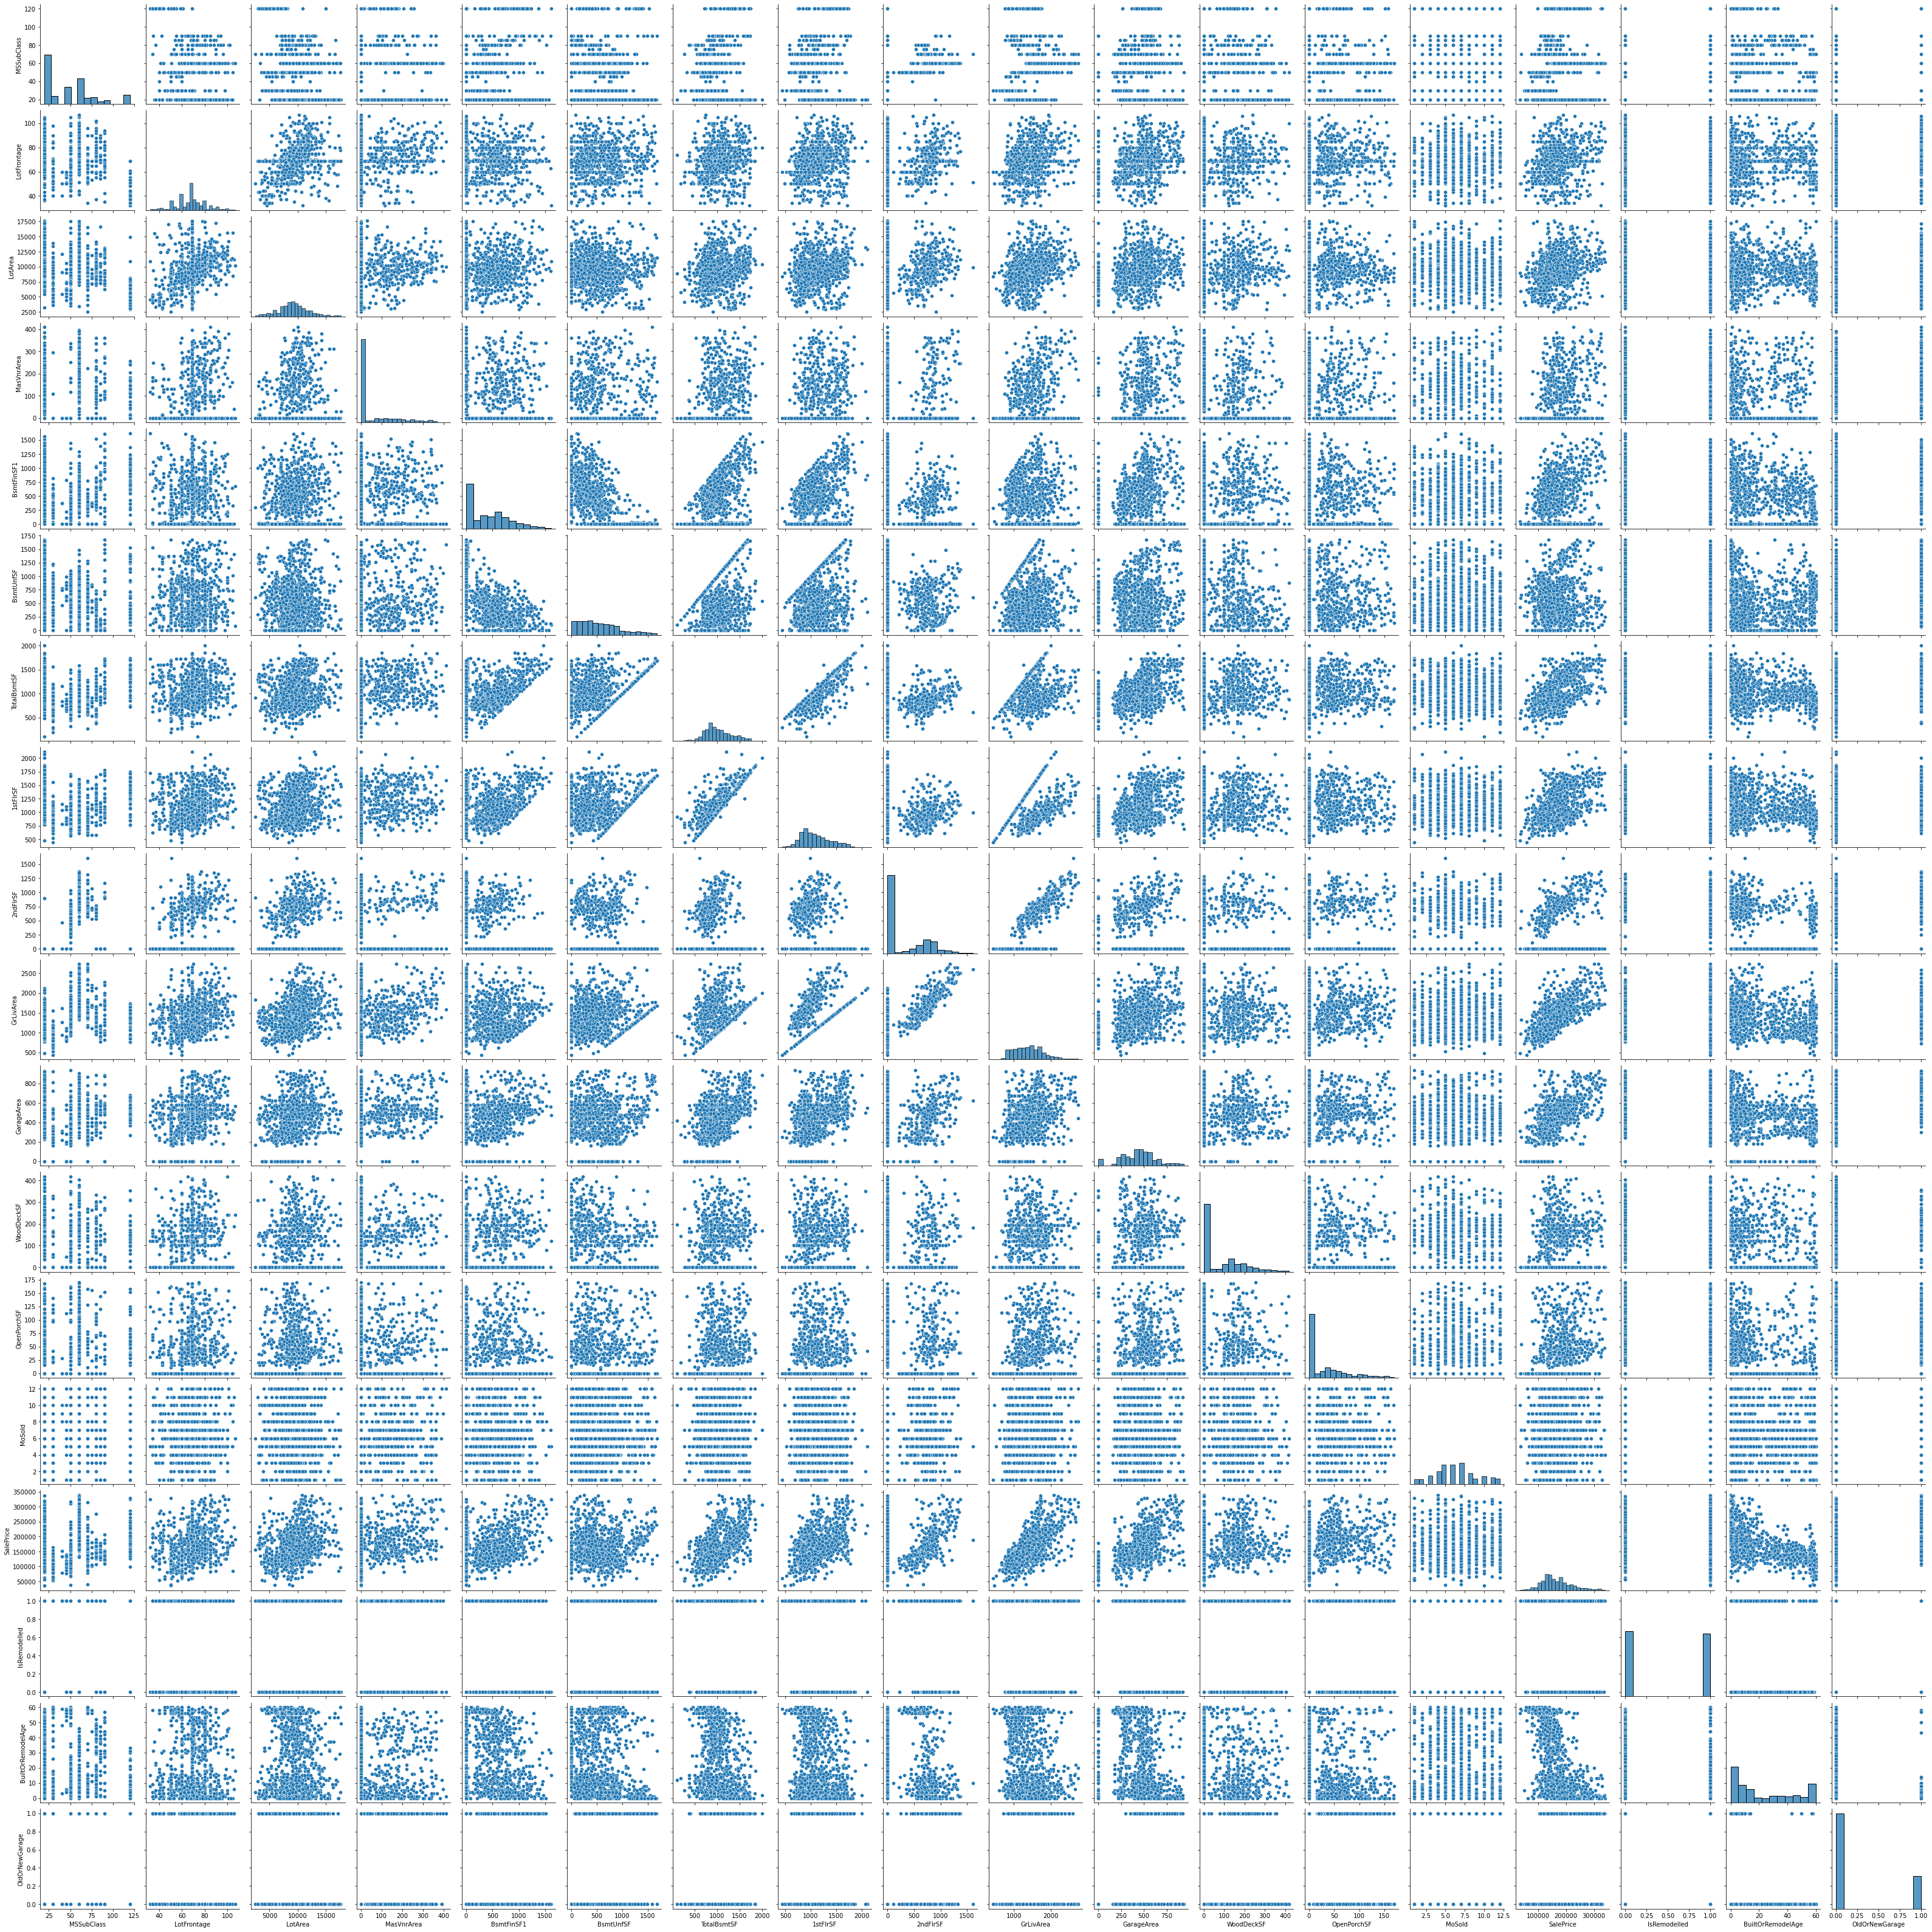

In [46]:
# Pairplot
sns.pairplot(df_continuous_4)
plt.show()

In [47]:
# Plotiing correlation matrix
# As categorical variable are already assigned numerical values. Excluding them from correlation plot.
corr = df_continuous_4.corr()
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap = sns.diverging_palette(10, 133, as_cmap = True), axis = None, vmin = -1, vmax = 1)
 .highlight_null(null_color = '#f1f1f1')  # Color NaNs grey
 .format(precision = 2))

### <span style="color : #16a085">Insights</span>
1. High Positive Correlation: 1stFlrSF & TotalBsmtSF, GrLivArea & 2ndFlrSF, SalePrice & GrLivArea <br>
2. High Negative Correlation: BsmtUnfSF & BsmtFinSF1, BuiltOrRemodelAge & SalePrice, OldOrNewGarage & BuiltOrRemodelAge

## <span style="color : #f39c12">Categorical - Continuous Bivariate Analysis</span>

As there are 31 categorical variables and 18 Continuos vatiables, plotting every relationsship will make the nterpreation difficult.
Hence, choosing the SalePrice against all categorical columns.
### <span style="color : #16a085"> Sale Price </span>

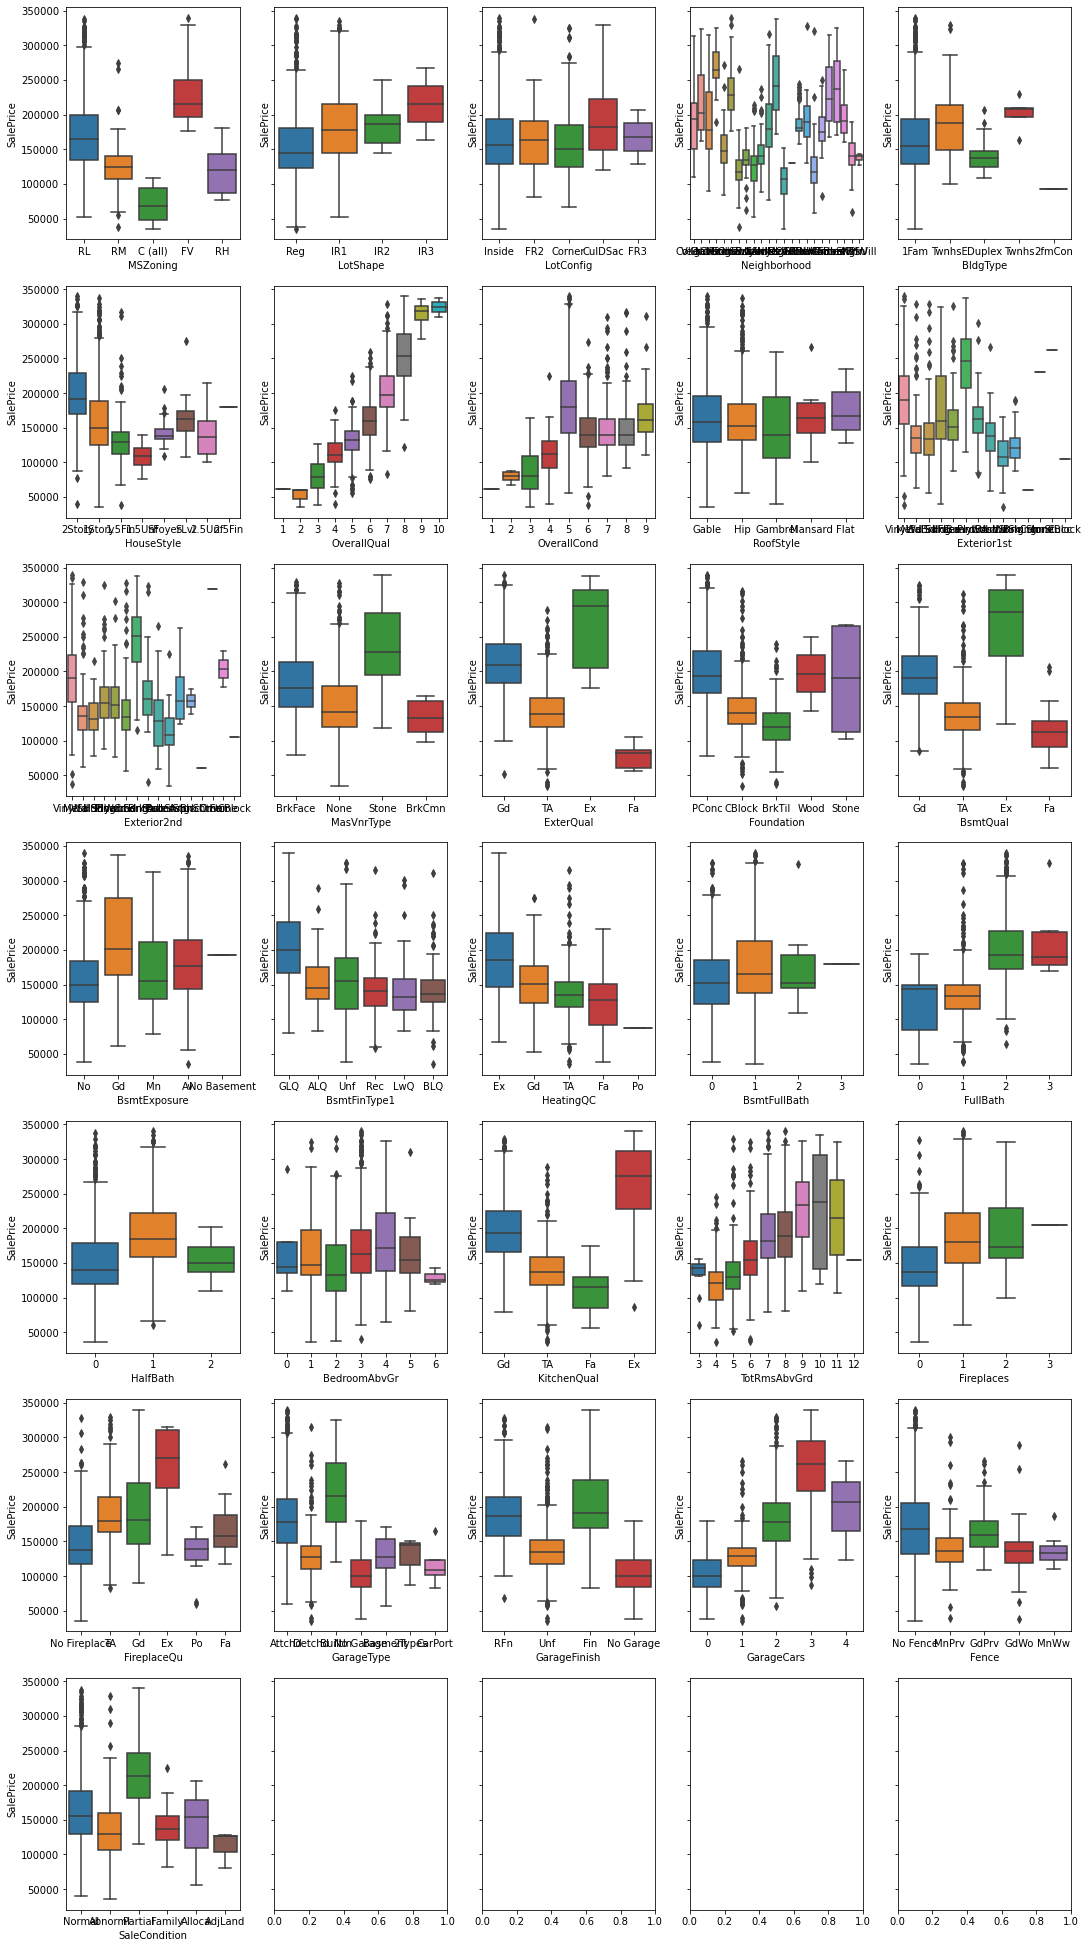

In [48]:
#A nalyzing SalePrice variable against categorical variable
# Lets analyze it in 31 parts of categorical variables
count = 0
plt.subplots(7, 5, figsize = (18, 35), sharex = False, sharey = True)
# for i in range(7):
for j in range(31):
    plt.subplot(7, 5, count + 1)
    b = sns.boxplot(x = df_categorical_4.iloc[:, j], y = df_continuous_4.iloc[:, 14], orient = 'vertical')
    b.set_xlabel(df_categorical_4.columns[j], fontsize = 10)
    b.set_ylabel(df_continuous_4.columns[14], fontsize = 10)
    b.tick_params(labelsize = 10)
    count += 1
plt.show()

### <span style="color : #16a085">Insights</span>
1. Median Sale Price Increases with <br>
Lot Shape, OverallQual, TotalRmsAbvGrd <br>
2. Median Sale Price Decreases with <br>
BsmntFinType1, HeatingQC

# <span style="color : #c0392b">Step 3: Data Preparation</span>

## <span style="color : #f39c12">Combining the lower number of value counts into a new value called "Other"</span>

In [49]:
# Combining the lower number of value counts into a new value called "Other" to reduce the creation of dummy variables.
# As we can see that the type of dwelling are represented by their relevant code, we are combining the lower number of counts to an unique code call 100.
df = df.replace({'MSSubClass':{30:'Other', 40:'Other', 45:'Other', 70:'Other', 75:'Other', 80:'Other', 85:'Other', 
                               90:'Other', 160:'Other', 180:'Other', 190:'Other'}})
df = df.replace({'MSZoning':{'C (all)':'Other','RH':'Other','FV':'Other'}})
df = df.replace({'LotShape':{'IR2':'Other','IR3':'Other'}})
df = df.replace({'LotConfig':{'CulDSac':'Other','FR2':'Other','FR3':'Other'}})
df = df.replace({'Neighborhood':{'Blueste':'Other','NPkVill':'Other','Veenker':'Other','BrDale':'Other','Blmngtn':'Other','MeadowV':'Other','SWISU':'Other','StoneBr':'Other','ClearCr':'Other','IDOTRR':'Other','Timber':'Other','NoRidge':'Other','Mitchel':'Other'}})
df = df.replace({'HouseStyle':{'2.5Fin':'Other','2.5Unf':'Other','1.5Unf':'Other','SFoyer':'Other','SLvl':'Other'}})
df = df.replace({'OverallQual':{1:'Other',2:'Other',10:'Other',3:'Other',9:'Other'}})
df = df.replace({'OverallCond':{1:'Other',2:'Other',9:'Other',3:'Other',4:'Other'}})
df = df.replace({'RoofStyle':{'Shed':'Other','Mansard':'Other','Gambrel':'Other','Flat':'Other'}})
df = df.replace({'Exterior1st':{'ImStucc':'Other','AsphShn':'Other','CBlock':'Other','BrkComm':'Other','Stone':'Other','AsbShng':'Other','Stucco':'Other','WdShing':'Other','BrkFace':'Other','CemntBd':'Other'}})
df = df.replace({'Exterior2nd':{'CBlock':'Other','AsphShn':'Other','Stone':'Other','Brk Cmn':'Other','ImStucc':'Other','AsbShng':'Other','BrkFace':'Other','Stucco':'Other','Wd Shng':'Other','CmentBd':'Other'}})
df = df.replace({'Foundation':{'Wood':'Other','Stone':'Other','Slab':'Other'}})
df = df.replace({'GarageType':{'2Types':'Other','CarPort':'Other','Basment':'Other'}})
df = df.replace({'Fence':{'MnWw':'Other','GdWo':'Other','GdPrv':'Other'}})
df = df.replace({'SaleCondition':{'AdjLand':'Other','Alloca':'Other','Family':'Other'}})

## <span style="color : #f39c12">Assign Order to Ordinal Variables</span>

In [50]:
# These variables contain an order. Rather than creating dummy variables, lets asisgn an order to them.
df['LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'Other': 1, 'None': 0})
df['LotConfig'] = df['LotConfig'].map({'Inside': 3, 'Corner': 2, 'Other': 1, 'None': 0})
df['BldgType'] = df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0})
df['HouseStyle'] = df['HouseStyle'].map({'2Story': 4, '1.5Fin': 3, '1Story': 2, 'Other': 1, 'None': 0 })
df['MasVnrType'] = df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df['ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Basement': 0})
df['BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'No Basement': 0})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'No Basement': 0})
df['HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
df['GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'No Garage': 0 })

## <span style="color : #f39c12">Dummy Variables</span>

In [51]:
# Fetching the updated categorical and continuous columns from data post missing value imputataion
df_categorical_5 = df.select_dtypes(include = ['object'])
df_continuous_5 = df.select_dtypes(include = ['int64', 'float'])

In [52]:
# Checking dtypes distribution among 81 columns
df.dtypes.value_counts()

int64      28
object     19
float64     2
dtype: int64

In [53]:
# Checking categorical columns with 2 levels, i.e., Binary, if any
for i in df_categorical_5.columns:
    print(i, ":", df_categorical_5[i].nunique())

MSSubClass : 5
MSZoning : 3
Neighborhood : 13
OverallQual : 6
OverallCond : 5
RoofStyle : 3
Exterior1st : 6
Exterior2nd : 6
Foundation : 4
BsmtFullBath : 4
FullBath : 4
HalfBath : 3
BedroomAbvGr : 7
TotRmsAbvGrd : 10
Fireplaces : 4
GarageType : 5
GarageCars : 5
Fence : 3
SaleCondition : 4


We will use `dummy variables` except for variables that are already binary

In [54]:
df_categorical_dummy_0 = df[['LotShape', 'LotConfig', 'BldgType', 'HouseStyle', 'MasVnrType', 'ExterQual', 
                             'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 
                             'FireplaceQu', 'GarageFinish', 'IsRemodelled', 
                             'MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'OverallCond',
                             'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtFullBath',
                             'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                             'GarageType', 'GarageCars', 'Fence', 'SaleCondition']]

In [55]:
df_categorical_dummy = pd.concat(
    [pd.get_dummies(df_categorical_dummy_0[col], drop_first = True, prefix = col) for col in df_categorical_dummy_0], 
    axis=1)

In [56]:
# Shape of data from which dummy variables will be created
df_categorical_dummy_0.shape

(1020, 33)

In [57]:
# Shape of dummy variables data
df_categorical_dummy.shape

(1020, 124)

In [58]:
# Head of dummy variables data
df_categorical_dummy.head()

LotShape_2  LotShape_3  LotConfig_2  LotConfig_3  BldgType_2  BldgType_3  \
0           0           1            0            1           0           0   
1           0           1            0            0           0           0   
2           1           0            0            1           0           0   
3           1           0            1            0           0           0   
4           1           0            0            0           0           0   

   BldgType_4  BldgType_5  HouseStyle_2  HouseStyle_3  HouseStyle_4  \
0           0           0             0             0             1   
1           0           0             1             0             0   
2           0           0             0             0             1   
3           0           0             0             0             1   
4           0           0             0             0             1   

   MasVnrType_1  ExterQual_3  ExterQual_4  ExterQual_5  BsmtQual_3  \
0             1            0            1            0           0   
1             0            1            0            0           0   
2             1            0            1            0           0   
3             0            1            0            0           1   
4             1            0            1            0           0   

   BsmtQual_4  BsmtQual_5  BsmtExposure_1  BsmtExposure_2  BsmtExposure_3  \
0           1           0               1               0               0   
1           1           0               0               0               0   
2           1           0               0               1               0   
3           0           0               1               0               0   
4           1           0               0               0               1   

   BsmtExposure_4  BsmtFinType1_2  BsmtFinType1_3  BsmtFinType1_4  \
0               0               0               0               0   
1               1               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   BsmtFinType1_5  BsmtFinType1_6  HeatingQC_2  HeatingQC_3  HeatingQC_4  \
0               0               1            0            0            0   
1               1               0            0            0            0   
2               0               1            0            0            0   
3               1               0            0            0            1   
4               0               1            0            0            0   

   HeatingQC_5  KitchenQual_3  KitchenQual_4  KitchenQual_5  FireplaceQu_1  \
0            1              0              1              0              0   
1            1              1              0              0              0   
2            1              0              1              0              0   
3            0              0              1              0              0   
4            1              0              1              0              0   

   FireplaceQu_2  FireplaceQu_3  FireplaceQu_4  FireplaceQu_5  GarageFinish_1  \
0              0              0              0              0               0   
1              0              1              0              0               0   
2              0              1              0              0               0   
3              0              0              1              0               1   
4              0              1              0              0               0   

   ...  Foundation_PConc  BsmtFullBath_1  BsmtFullBath_2  BsmtFullBath_3  \
0  ...                 1               1               0               0   
1  ...                 0               0               0               0   
2  ...                 1               1               0               0   
3  ...                 0               1               0               0   
4  ...   

In [59]:
# Combining dummy variables with continuous variables
df2 = pd.concat([df_categorical_dummy, 
                 df[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 
                     'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
                     'OpenPorchSF', 'MoSold', 'SalePrice', 'BuiltOrRemodelAge', 
                     'OldOrNewGarage']]], axis = 1)

In [60]:
# Checking shape and head of combined data
pd.set_option('display.max_columns', df2.shape[1])
print("Shape: ", df2.shape)
df2.head()

Shape:  (1020, 140)


LotShape_2  LotShape_3  LotConfig_2  LotConfig_3  BldgType_2  BldgType_3  \
0           0           1            0            1           0           0   
1           0           1            0            0           0           0   
2           1           0            0            1           0           0   
3           1           0            1            0           0           0   
4           1           0            0            0           0           0   

   BldgType_4  BldgType_5  HouseStyle_2  HouseStyle_3  HouseStyle_4  \
0           0           0             0             0             1   
1           0           0             1             0             0   
2           0           0             0             0             1   
3           0           0             0             0             1   
4           0           0             0             0             1   

   MasVnrType_1  ExterQual_3  ExterQual_4  ExterQual_5  BsmtQual_3  \
0             1            0            1            0           0   
1             0            1            0            0           0   
2             1            0            1            0           0   
3             0            1            0            0           1   
4             1            0            1            0           0   

   BsmtQual_4  BsmtQual_5  BsmtExposure_1  BsmtExposure_2  BsmtExposure_3  \
0           1           0               1               0               0   
1           1           0               0               0               0   
2           1           0               0               1               0   
3           0           0               1               0               0   
4           1           0               0               0               1   

   BsmtExposure_4  BsmtFinType1_2  BsmtFinType1_3  BsmtFinType1_4  \
0               0               0               0               0   
1               1               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   BsmtFinType1_5  BsmtFinType1_6  HeatingQC_2  HeatingQC_3  HeatingQC_4  \
0               0               1            0            0            0   
1               1               0            0            0            0   
2               0               1            0            0            0   
3               1               0            0            0            1   
4               0               1            0            0            0   

   HeatingQC_5  KitchenQual_3  KitchenQual_4  KitchenQual_5  FireplaceQu_1  \
0            1              0              1              0              0   
1            1              1              0              0              0   
2            1              0              1              0              0   
3            0              0              1              0              0   
4            1              0              1              0              0   

   FireplaceQu_2  FireplaceQu_3  FireplaceQu_4  FireplaceQu_5  GarageFinish_1  \
0              0              0              0              0               0   
1              0              1              0              0               0   
2              0              1              0              0               0   
3              0              0              1              0               1   
4              0              1              0              0               0   

   GarageFinish_2  GarageFinish_3  IsRemodelled_1  MSSubClass_50  \
0               1               0               0              0   
1               1               0               0              0   
2               1               0               1              0   
3               0               0               1              0   
4               1               0               0

# <span style="color : #c0392b">Step 4: Splitting the Data into Training and Testing Sets</span>

As you know, the first basic step for regression is performing a train-test split.

In [61]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [62]:
df_train.head()

LotShape_2  LotShape_3  LotConfig_2  LotConfig_3  BldgType_2  \
1235           0           1            0            1           0   
405            1           0            1            0           0   
322            1           0            0            1           0   
542            0           1            0            1           0   
790            0           1            0            1           0   

      BldgType_3  BldgType_4  BldgType_5  HouseStyle_2  HouseStyle_3  \
1235           0           0           0             0             0   
405            0           0           0             1             0   
322            0           0           0             0             0   
542            0           0           0             1             0   
790            0           1           0             1             0   

      HouseStyle_4  MasVnrType_1  ExterQual_3  ExterQual_4  ExterQual_5  \
1235             1             0            1            0            0   
405              0             0            1            0            0   
322              1             1            0            1            0   
542              0             0            0            1            0   
790              0             1            0            1            0   

      BsmtQual_3  BsmtQual_4  BsmtQual_5  BsmtExposure_1  BsmtExposure_2  \
1235           0           1           0               0               1   
405            1           0           0               1               0   
322            1           0           0               0               0   
542            0           0           1               1               0   
790            0           1           0               1               0   

      BsmtExposure_3  BsmtExposure_4  BsmtFinType1_2  BsmtFinType1_3  \
1235               0               0               0               0   
405                0               0               0               0   
322                0               1               1               0   
542                0               0               1               0   
790                0               0               0               0   

      BsmtFinType1_4  BsmtFinType1_5  BsmtFinType1_6  HeatingQC_2  \
1235               0               0               0            0   
405                1               0               0            0   
322                0               0               0            0   
542                0               0               0            0   
790                0               0               1            0   

      HeatingQC_3  HeatingQC_4  HeatingQC_5  KitchenQual_3  KitchenQual_4  \
1235            0            1            0              1              0   
405             0            0            1              1              0   
322             0            0            1              0              1   
542             0            0            1              0              1   
790             0            0            1              0              1   

      KitchenQual_5  FireplaceQu_1  FireplaceQu_2  FireplaceQu_3  \
1235              0              0              0              0   
405               0              0              0              1   
322               0              0              0              1   
542               0              0              0              1   
790               0              0              0              0   

      FireplaceQu_4  FireplaceQu_5  GarageFinish_1  GarageFinish_2  \
1235              0              0               1               0   
405               0              0               1               0   
322               0              0               0               0   
542               0              0               0               0   
790               1              0               0               0   

      GarageFinish_3  IsRemodelled_1  MSSubClass_50  MSSubClass_60  \
1235               0             

In [63]:
# Rescaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [64]:
# Fetching continuous columns for scaling
df_continuous2 = df[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 
                     'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
                     'OpenPorchSF', 'MoSold', 'SalePrice', 'BuiltOrRemodelAge', 
                     'OldOrNewGarage']]

In [65]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[df_continuous2.columns] = scaler.fit_transform(df_train[df_continuous2.columns])

In [66]:
df_train.head()

LotShape_2  LotShape_3  LotConfig_2  LotConfig_3  BldgType_2  \
1235           0           1            0            1           0   
405            1           0            1            0           0   
322            1           0            0            1           0   
542            0           1            0            1           0   
790            0           1            0            1           0   

      BldgType_3  BldgType_4  BldgType_5  HouseStyle_2  HouseStyle_3  \
1235           0           0           0             0             0   
405            0           0           0             1             0   
322            0           0           0             0             0   
542            0           0           0             1             0   
790            0           1           0             1             0   

      HouseStyle_4  MasVnrType_1  ExterQual_3  ExterQual_4  ExterQual_5  \
1235             1             0            1            0            0   
405              0             0            1            0            0   
322              1             1            0            1            0   
542              0             0            0            1            0   
790              0             1            0            1            0   

      BsmtQual_3  BsmtQual_4  BsmtQual_5  BsmtExposure_1  BsmtExposure_2  \
1235           0           1           0               0               1   
405            1           0           0               1               0   
322            1           0           0               0               0   
542            0           0           1               1               0   
790            0           1           0               1               0   

      BsmtExposure_3  BsmtExposure_4  BsmtFinType1_2  BsmtFinType1_3  \
1235               0               0               0               0   
405                0               0               0               0   
322                0               1               1               0   
542                0               0               1               0   
790                0               0               0               0   

      BsmtFinType1_4  BsmtFinType1_5  BsmtFinType1_6  HeatingQC_2  \
1235               0               0               0            0   
405                1               0               0            0   
322                0               0               0            0   
542                0               0               0            0   
790                0               0               1            0   

      HeatingQC_3  HeatingQC_4  HeatingQC_5  KitchenQual_3  KitchenQual_4  \
1235            0            1            0              1              0   
405             0            0            1              1              0   
322             0            0            1              0              1   
542             0            0            1              0              1   
790             0            0            1              0              1   

      KitchenQual_5  FireplaceQu_1  FireplaceQu_2  FireplaceQu_3  \
1235              0              0              0              0   
405               0              0              0              1   
322               0              0              0              1   
542               0              0              0              1   
790               0              0              0              0   

      FireplaceQu_4  FireplaceQu_5  GarageFinish_1  GarageFinish_2  \
1235              0              0               1               0   
405               0              0               1               0   
322               0              0               0               0   
542               0              0               0               0   
790               1              0               0               0   

      GarageFinish_3  IsRemodelled_1  MSSubClass_50  MSSubClass_60  \
1235               0             

In [67]:
# Let's check the correlation coefficients to see which variables are highly correlated
corr2 = df_train.corr()
mask2 = np.zeros_like(corr2, dtype = bool)
mask2[np.triu_indices_from(mask2)] = True
corr2[mask2] = np.nan
(corr2
 .style
 .background_gradient(cmap = "YlGnBu", axis = None, vmin = -1, vmax = 1)
 .highlight_null(null_color = '#f1f1f1')  # Color NaNs grey
 .format(precision = 2))

### <span style="color : #16a085">Insights</span>
1. High Positive Correlation: MSSubClass_120 &  BldgType_4, MSSubClass_50 & HouseStyle_3, MSSubClass_60 & HouseStyle_4, 2ndFlrSF & HouseStyle_4, 1stFlrSF & TotalBsmtSF<br>

## <span style="color : #f39c12"> Dividing into X and Y sets for the model building </span>

In [68]:
y_train = df_train.pop('SalePrice')
X_train = df_train

# <span style="color : #c0392b"> Step 5: Building a linear model </span>
Let's first start off with an automated feature selection technique (RFE) and then move to manual feature elimination (using p-values and VIFs) <br>
We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [69]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [70]:
X_train.shape

(714, 139)

In [71]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 35) # running RFE
rfe = rfe.fit(X_train, y_train)

In [72]:
pd.concat([pd.DataFrame(X_train.columns, columns = ['X_train']), 
           pd.DataFrame(rfe.support_, columns = ['RFE_Support']), 
           pd.DataFrame(rfe.ranking_, columns = ['RFE_Ranking'])], axis = 1)

X_train  RFE_Support  RFE_Ranking
0               LotShape_2        False           61
1               LotShape_3        False           60
2              LotConfig_2        False           88
3              LotConfig_3        False           91
4               BldgType_2        False           47
5               BldgType_3         True            1
6               BldgType_4        False           36
7               BldgType_5        False           11
8             HouseStyle_2        False            9
9             HouseStyle_3        False           63
10            HouseStyle_4        False            6
11            MasVnrType_1        False           99
12             ExterQual_3         True            1
13             ExterQual_4         True            1
14             ExterQual_5         True            1
15              BsmtQual_3        False          100
16              BsmtQual_4        False           70
17              BsmtQual_5         True            1
18          BsmtExposure_1        False           27
19          BsmtExposure_2        False           28
20          BsmtExposure_3        False           26
21          BsmtExposure_4        False            4
22          BsmtFinType1_2        False           49
23          BsmtFinType1_3        False           80
24          BsmtFinType1_4        False           96
25          BsmtFinType1_5        False          104
26          BsmtFinType1_6        False           43
27             HeatingQC_2        False           54
28             HeatingQC_3        False           53
29             HeatingQC_4        False           52
30             HeatingQC_5        False           51
31           KitchenQual_3        False           34
32           KitchenQual_4        False           32
33           KitchenQual_5         True            1
34           FireplaceQu_1         True            1
35           FireplaceQu_2         True            1
36           FireplaceQu_3         True            1
37           FireplaceQu_4         True            1
38           FireplaceQu_5         True            1
39          GarageFinish_1         True            1
40          GarageFinish_2         True            1
41          GarageFinish_3         True            1
42          IsRemodelled_1        False          101
43           MSSubClass_50        False           12
44           MSSubClass_60        False           97
45          MSSubClass_120        False           35
46        MSSubClass_Other        False           18
47             MSZoning_RL        False           38
48             MSZoning_RM        False           83
49    Neighborhood_CollgCr        False           42
50    Neighborhood_Crawfor         True            1
51    Neighborhood_Edwards        False           16
52    Neighborhood_Gilbert        False           39
53      Neighborhood_NAmes        False            5
54     Neighborhood_NWAmes        False            8
55    Neighborhood_NridgHt        False           72
56    Neighborhood_OldTown        False            7
57      Neighborhood_Other        False           40
58     Neighborhood_Sawyer        False           22
59    Neighborhood_SawyerW        False           41
60    Neighborhood_Somerst         True            1
61           OverallQual_5        False           79
62           OverallQual_6        False           95
63           OverallQual_7        False           15
64           OverallQual_8         True            1
65       OverallQual_Other        False           29
66           OverallCond_6        False           55
67           OverallCond_7        False           37
68           OverallCond_8        False           24
69       OverallCond_Other        False           75
70           RoofStyle_Hip        False          102
71         RoofStyle_Other        False           45
72     Exterior1st_MetalSd        False           92
73       Exterior1st_Other        False           77
74     Exterior1st_Plywood        False     

In [73]:
#RFE Support == True
col = X_train.columns[rfe.support_]
col

Index(['BldgType_3', 'ExterQual_3', 'ExterQual_4', 'ExterQual_5', 'BsmtQual_5',
       'KitchenQual_5', 'FireplaceQu_1', 'FireplaceQu_2', 'FireplaceQu_3',
       'FireplaceQu_4', 'FireplaceQu_5', 'GarageFinish_1', 'GarageFinish_2',
       'GarageFinish_3', 'Neighborhood_Crawfor', 'Neighborhood_Somerst',
       'OverallQual_8', 'BsmtFullBath_3', 'HalfBath_2', 'BedroomAbvGr_6',
       'Fireplaces_1', 'Fireplaces_2', 'Fireplaces_3', 'GarageType_No Garage',
       'GarageType_Other', 'GarageCars_1', 'GarageCars_2', 'GarageCars_3',
       'GarageCars_4', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'],
      dtype='object')

In [74]:
#RFE Support == False
X_train.columns[~rfe.support_]

Index(['LotShape_2', 'LotShape_3', 'LotConfig_2', 'LotConfig_3', 'BldgType_2',
       'BldgType_4', 'BldgType_5', 'HouseStyle_2', 'HouseStyle_3',
       'HouseStyle_4',
       ...
       'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'BuiltOrRemodelAge',
       'OldOrNewGarage'],
      dtype='object', length=104)

## <span style="color : #f39c12"> Building model using statsmodel, for the detailed statistics </span>

Fit a regression line through the training data using `statsmodels`. <br>
In `statsmodels`, a constant will be explicitly added using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [75]:
# Creating X_test dataframe with RFE selected variables
import statsmodels.api as sm 
X_train_2 = X_train[col]
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_2)
# Running the linear modelm
lm_2 = sm.OLS(y_train, X_train_lm).fit()
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.83e-281
Time:                        14:37:10   Log-Likelihood:                 951.86
No. Observations:                 714   AIC:                            -1840.
Df Residuals:                     682   BIC:                            -1693.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

`FireplaceQu_1` is insignificant in presence of other variables; can be dropped.

In [76]:
X_train_3 = X_train_2.drop(["Fireplaces_2"], axis = 1)

### <span style="color : #16a085"> Rebuilding the model without `Fireplaces_2` </span>

In [77]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_3)
lm_3 = sm.OLS(y_train, X_train_lm).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.83e-281
Time:                        14:37:10   Log-Likelihood:                 951.86
No. Observations:                 714   AIC:                            -1840.
Df Residuals:                     682   BIC:                            -1693.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

`GarageCars_2` is insignificant in presence of other variables; can be dropped.

### <span style="color : #16a085"> Rebuilding the model without `GarageCars_2` </span>

In [78]:
X_train_4 = X_train_3.drop(["GarageCars_2"], axis = 1)
X_train_lm = sm.add_constant(X_train_4)
lm_4 = sm.OLS(y_train, X_train_lm).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.83e-281
Time:                        14:37:10   Log-Likelihood:                 951.86
No. Observations:                 714   AIC:                            -1840.
Df Residuals:                     682   BIC:                            -1693.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

### <span style="color : #16a085"> Rebuilding the model without `FireplaceQu_5` </span>

In [79]:
X_train_5 = X_train_4.drop(["FireplaceQu_5"], axis = 1)
X_train_lm = sm.add_constant(X_train_5)
lm_5 = sm.OLS(y_train, X_train_lm).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     155.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.34e-282
Time:                        14:37:10   Log-Likelihood:                 951.82
No. Observations:                 714   AIC:                            -1842.
Df Residuals:                     683   BIC:                            -1700.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

`BedroomAbvGr_6` is insignificant in presence of other variables; can be dropped.

### <span style="color : #16a085"> Rebuilding the model without `BedroomAbvGr_6` </span>

In [80]:
X_train_6 = X_train_5.drop(["BedroomAbvGr_6"], axis = 1)
X_train_lm = sm.add_constant(X_train_6)
lm_6 = sm.OLS(y_train, X_train_lm).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     155.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.34e-282
Time:                        14:37:10   Log-Likelihood:                 951.82
No. Observations:                 714   AIC:                            -1842.
Df Residuals:                     683   BIC:                            -1700.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

`FireplaceQu_2` is insignificant in presence of other variables; can be dropped.

### <span style="color : #16a085"> Rebuilding the model without `FireplaceQu_2` </span>

In [81]:
X_train_7 = X_train_6.drop(["FireplaceQu_2"], axis = 1)
X_train_lm = sm.add_constant(X_train_7)
lm_7 = sm.OLS(y_train, X_train_lm).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     161.3
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.01e-283
Time:                        14:37:10   Log-Likelihood:                 951.72
No. Observations:                 714   AIC:                            -1843.
Df Residuals:                     684   BIC:                            -1706.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

`Fireplaces_1` is insignificant in presence of other variables; can be dropped.

### <span style="color : #16a085"> Rebuilding the model without `Fireplaces_1` </span>

In [82]:
X_train_8 = X_train_7.drop(["Fireplaces_1"], axis = 1)
X_train_lm = sm.add_constant(X_train_8)
lm_8 = sm.OLS(y_train, X_train_lm).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     167.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.86e-284
Time:                        14:37:10   Log-Likelihood:                 951.52
No. Observations:                 714   AIC:                            -1845.
Df Residuals:                     685   BIC:                            -1712.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

`FireplaceQu_1` is insignificant in presence of other variables; can be dropped.

### <span style="color : #16a085"> Rebuilding the model without `FireplaceQu_1` </span>

In [83]:
X_train_9 = X_train_8.drop(["FireplaceQu_1"], axis = 1)
X_train_lm = sm.add_constant(X_train_9)
lm_9 = sm.OLS(y_train, X_train_lm).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.52e-285
Time:                        14:37:10   Log-Likelihood:                 951.43
No. Observations:                 714   AIC:                            -1847.
Df Residuals:                     686   BIC:                            -1719.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

## All variables has a p-value < 0.5. Hence, all are significant.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [84]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_9.values, i) for i in range(X_train_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.T

8               9               10           2   \
Features  GarageFinish_1  GarageFinish_2  GarageFinish_3  ExterQual_4   
VIF                64.88           46.39           35.92         30.3   

                   1                     17           25        26  \
Features  ExterQual_3  GarageType_No Garage  TotalBsmtSF  1stFlrSF   
VIF             29.45                  7.14         4.76      4.24   

                   3                      23        27                    22  \
Features  ExterQual_5  SaleCondition_Partial  2ndFlrSF  SaleCondition_Normal   
VIF              2.78                   2.16      1.77                  1.77   

                     13            20          4             19          0   \
Features  OverallQual_8  GarageCars_3  BsmtQual_5  GarageCars_1  BldgType_3   
VIF                1.71          1.62        1.51          1.51        1.45   

                     7              6              5          24          15  \
Features  FireplaceQu_4  FireplaceQu_3  KitchenQual_5  BsmtUnfSF  HalfBath_2   
VIF                1.43           1.43           1.37       1.33        1.22   

                            12                18                    11  \
Features  Neighborhood_Somerst  GarageType_Other  Neighborhood_Crawfor   
VIF                       1.22              1.13                  1.12   

                      14            16            21  
Features  BsmtFullBath_3  Fireplaces_3  GarageCars_4  
VIF                 1.11          1.02          1.02

In [86]:
X_train_10 = X_train_9.drop(["GarageFinish_1"], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_10.values, i) for i in range(X_train_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.T

24        25           1            2   \
Features  TotalBsmtSF  1stFlrSF  ExterQual_3  ExterQual_4   
VIF             47.72     26.72        18.69        12.78   

                            21         23        26              8   \
Features  SaleCondition_Normal  BsmtUnfSF  2ndFlrSF  GarageFinish_2   
VIF                      10.13       4.04      2.69            2.38   

                             22              9             18             12  \
Features  SaleCondition_Partial  GarageFinish_3  GarageCars_1  OverallQual_8   
VIF                         2.3            2.26          2.09           1.89   

                     7              6             19           3           4   \
Features  FireplaceQu_4  FireplaceQu_3  GarageCars_3  ExterQual_5  BsmtQual_5   
VIF                1.83           1.82          1.76         1.73        1.58   

                  0              5                     16  \
Features  BldgType_3  KitchenQual_5  GarageType_No Garage   
VIF             1.47           1.42                  1.31   

                            11          14                    10  \
Features  Neighborhood_Somerst  HalfBath_2  Neighborhood_Crawfor   
VIF                       1.28        1.23                  1.16   

                      13                17            20            15  
Features  BsmtFullBath_3  GarageType_Other  GarageCars_4  Fireplaces_3  
VIF                 1.11              1.09          1.03          1.02

In [87]:
X_train_11 = X_train_10.drop(["TotalBsmtSF"], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_11.columns
vif['VIF'] = [variance_inflation_factor(X_train_11.values, i) for i in range(X_train_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.T

1         24           2                     21         23  \
Features  ExterQual_3  1stFlrSF  ExterQual_4  SaleCondition_Normal  BsmtUnfSF   
VIF             14.74     12.18        10.25                  10.1       3.89   

                25              8                      22              9   \
Features  2ndFlrSF  GarageFinish_2  SaleCondition_Partial  GarageFinish_3   
VIF           2.55            2.33                   2.29            2.22   

                    18             12             7              6   \
Features  GarageCars_1  OverallQual_8  FireplaceQu_4  FireplaceQu_3   
VIF               2.09           1.88           1.83            1.8   

                    19           3           4           0              5   \
Features  GarageCars_3  ExterQual_5  BsmtQual_5  BldgType_3  KitchenQual_5   
VIF               1.75         1.62        1.57        1.45           1.42   

                            16                    11          14  \
Features  GarageType_No Garage  Neighborhood_Somerst  HalfBath_2   
VIF                       1.31                  1.27        1.23   

                            10              13                17  \
Features  Neighborhood_Crawfor  BsmtFullBath_3  GarageType_Other   
VIF                       1.15            1.11              1.09   

                    20            15  
Features  GarageCars_4  Fireplaces_3  
VIF               1.03          1.02

In [88]:
X_train_12 = X_train_11.drop(["ExterQual_3"], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X_train_12.columns
vif['VIF'] = [variance_inflation_factor(X_train_12.values, i) for i in range(X_train_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.T

23                    20         22           1   \
Features  1stFlrSF  SaleCondition_Normal  BsmtUnfSF  ExterQual_4   
VIF           8.39                  6.63       3.85         2.74   

                      7         24              8                      21  \
Features  GarageFinish_2  2ndFlrSF  GarageFinish_3  SaleCondition_Partial   
VIF                  2.3      2.19            2.19                   2.06   

                     11             6              5             17  \
Features  OverallQual_8  FireplaceQu_4  FireplaceQu_3  GarageCars_1   
VIF                1.86           1.82            1.8          1.76   

                    18          3           0              4            2   \
Features  GarageCars_3  BsmtQual_5  BldgType_3  KitchenQual_5  ExterQual_5   
VIF               1.75        1.57        1.45           1.42         1.31   

                            10                    15          13  \
Features  Neighborhood_Somerst  GarageType_No Garage  HalfBath_2   
VIF                       1.27                  1.25        1.23   

                            9               12                16  \
Features  Neighborhood_Crawfor  BsmtFullBath_3  GarageType_Other   
VIF                       1.15            1.11              1.08   

                    19            14  
Features  GarageCars_4  Fireplaces_3  
VIF               1.03          1.02

In [89]:
X_train_lm = sm.add_constant(X_train_12)
lm_12 = sm.OLS(y_train, X_train_lm).fit()
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     165.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.98e-271
Time:                        14:37:11   Log-Likelihood:                 912.07
No. Observations:                 714   AIC:                            -1772.
Df Residuals:                     688   BIC:                            -1653.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [90]:
X_train_12.shape

(714, 25)

# <span style="color : #c0392b"> Step 7: Residual Analysis of the train data </span>

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

## <span style="color : #f39c12"> Normal Distribution of Error Terms </span>

In [91]:
y_train_price = lm_12.predict(X_train_lm)

Text(0.5, 0, 'Errors')

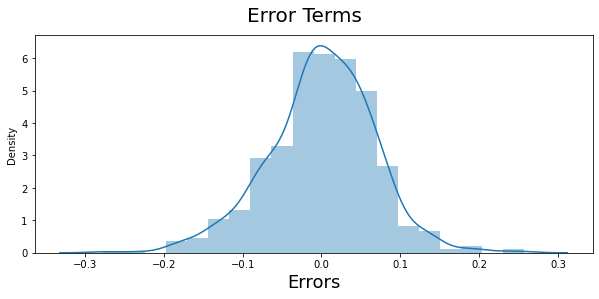

In [92]:
# Plot the histogram of the error terms
fig = plt.figure(figsize= (10, 4))
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# <span style="color : #c0392b"> Step 8: Making Predictions Using the Final Model </span>

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

## <span style="color : #f39c12"> Applying the scaling on the test sets </span>

In [93]:
df_test[df_continuous2.columns] = scaler.transform(df_test[df_continuous2.columns])

## <span style="color : #f39c12"> Dividing into X_test and y_test </span>

In [94]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [95]:
# Creating X_test_1 dataframe by keeping the significant variables in final model of X_train.
col1 = X_train_12.columns
X_test_1 = X_test[col1]
# Adding constant variable to test dataframe
X_test_2 = sm.add_constant(X_test_1)
# Making predictions using the last model
y_pred = lm_12.predict(X_test_2)

# <span style="color : #c0392b"> Step 9: Model Evaluation </span>

In [96]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared)*(n - 1)/(n - p - 1)

In [97]:
print('Mean_Squared_Error :', round(mse, 3))
print('r_square_value :', round(r_squared, 3))
print('Adjusted_r_square_value :', round(adjusted_r_squared, 3))

Mean_Squared_Error : 0.006
r_square_value : 0.805
Adjusted_r_square_value : 0.642


Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

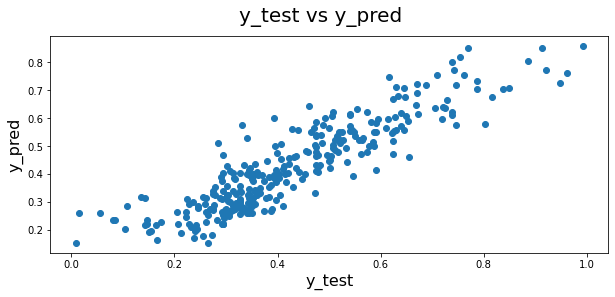

In [98]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize= (10, 4))
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 16)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Text(0, 0.5, 'Sale Price')

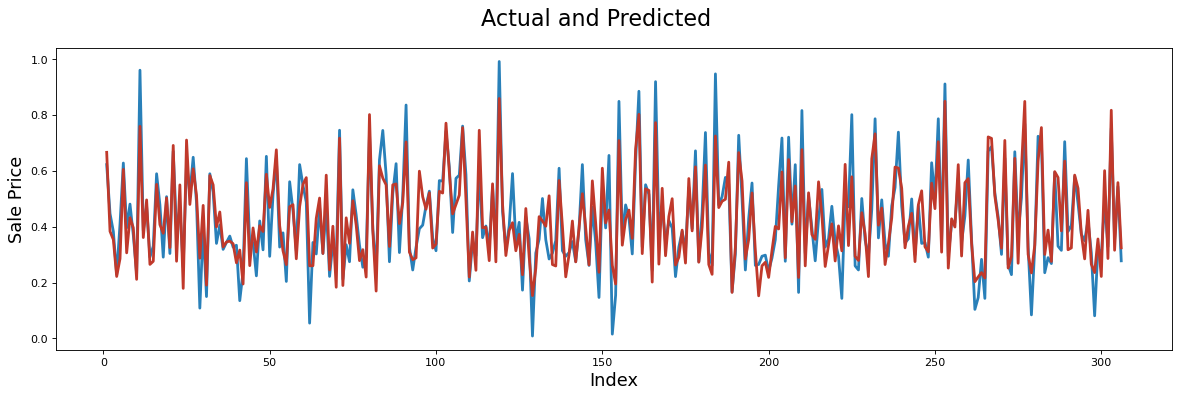

In [99]:
# Actual vs Predicted
c = [i for i in range(1, 307, 1)]
fig = plt.figure(figsize = (18, 5), dpi = 80)
plt.plot(c, y_test, color = "#2980b9", linewidth = 2.5, linestyle = "-")
plt.plot(c, y_pred, color = "#c0392b",  linewidth = 2.5, linestyle = "-")
fig.suptitle('Actual and Predicted', fontsize = 20)              # Plot heading 
plt.xlabel('Index', fontsize = 16)                               # X-label
plt.ylabel('Sale Price', fontsize = 16)                               # Y-label

Text(0, 0.5, 'Sale Price')

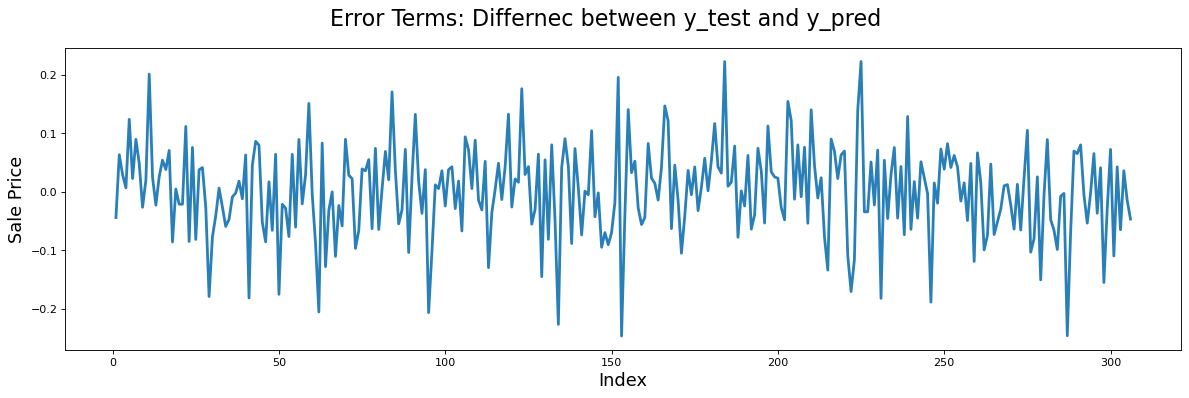

In [100]:
# Error terms
c = [i for i in range(1, 307, 1)]
fig = plt.figure(figsize = (18, 5), dpi = 80)
plt.plot(c, y_test - y_pred, color = "#2980b9", linewidth = 2.5, linestyle = "-")
fig.suptitle('Error Terms: Differnec between y_test and y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('Index', fontsize = 16)                      # X-label
plt.ylabel('Sale Price', fontsize = 16)                # Y-label

<hr style="border: 3.5px solid #c0392b"> </hr>

# <span style="color : #c0392b"> Step 10: Ridge Regression </span>

In [101]:
# list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score = True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
# display the mean scores
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
14         3.0         -0.037077        -0.046668                1
15         4.0         -0.037543        -0.046689                2
13         2.0         -0.036568        -0.046701                3
16         5.0         -0.037993        -0.046760                4
17         6.0         -0.038415        -0.046883                5
12         1.0         -0.035974        -0.046934                6
11         0.9         -0.035906        -0.047000                7
18         7.0         -0.038825        -0.047042                8
10         0.8         -0.035835        -0.047078                9
9          0.7         -0.035761        -0.047175               10
19         8.0         -0.039226        -0.047238               11
8          0.6         -0.035684        -0.047283               12
7          0.5         -0.035604        -0.047403               13
20         9.0         -0.039605        -0.047444               14
6          0.4         -0.035527        -0.047539               15
21        10.0         -0.039962        -0.047656               16
5          0.3         -0.035448        -0.047706               17
4          0.2         -0.035361        -0.047909               18
3          0.1         -0.035282        -0.048182               19
2         0.01         -0.035234        -0.048590               20
1        0.001         -0.035237        -0.048680               21
0       0.0001         -0.035237        -0.048690               22
22          20         -0.042998        -0.049695               23
23          50         -0.048761        -0.054361               24
24         100         -0.054406        -0.059065               25
25         500         -0.071424        -0.073676               26

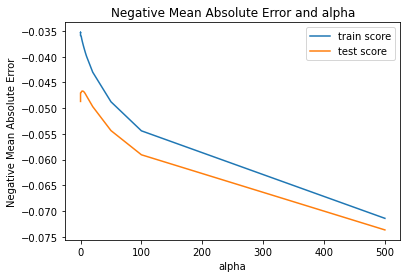

In [103]:
# plotting mean test and train scores with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

In [104]:
# get the best estimator for lambda
ridge_model_cv.best_estimator_

Ridge(alpha=3.0)

## <span style="color : #f39c12"> Ridge regression with optimal alpha = 3 </span>

In [105]:
# check the coefficient values with lambda = 3
alpha = 3
ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.53512829e-02, -2.33003365e-02,  6.05722934e-03,  2.76168449e-03,
        1.64388316e-03, -2.82427312e-02,  6.42564743e-03,  1.53514299e-03,
       -1.34779911e-02,  7.89431255e-03, -3.41671492e-03,  1.37071338e-03,
        3.94413958e-03,  1.83512108e-02,  3.59455293e-02, -8.34131934e-03,
        1.65602514e-03,  6.30633106e-02, -4.16376920e-03, -1.51802336e-02,
        4.00532345e-03,  3.53966538e-02, -8.37638031e-03,  1.04591497e-03,
        5.08687859e-03,  5.57225244e-03,  2.85703897e-02, -6.68296882e-03,
       -6.28352419e-04,  3.05127019e-03,  1.28803545e-02,  8.16550191e-03,
        1.55428312e-02,  7.52063714e-02,  5.87620815e-03, -1.58403252e-03,
        1.46158448e-02,  7.53236059e-03,  1.74210369e-02, -1.90959124e-03,
        1.32827672e-02,  1.55386362e-02,  1.15625581e-04, -2.70460155e-02,
       -1.50334135e-03, -8.53611874e-03, -2.11734490e-02,  2.46952559e-02,
        5.26403279e-03, -1.82574534e-02,  6.54111389e-02, -4.39836294e-02,
       -3.56392950e-02, -

## <span style="color : #f39c12"> Model evaluation Ridge Regression </span>

In [106]:
# Model performance on the train set
y_train_pred = ridge.predict(X_train)
print("R Square on training data: ", round(metrics.r2_score(y_true = y_train, y_pred = y_train_pred), 4))
# Model performance on the test set
y_test_pred = ridge.predict(X_test)
print("R Square on test data: ", round(metrics.r2_score(y_true = y_test, y_pred = y_test_pred), 4))
# Check the mean squared error and RMSE
print("Mean Squared Error: ", round(mean_squared_error(y_test, ridge.predict(X_test)), 5))
print('RMSE :', round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), 5))

R Square on training data:  0.919
R Square on test data:  0.8967
Mean Squared Error:  0.00323
RMSE : 0.05683


We have a good train score 91.9% and good test score as well 89.67%. <br>
That means what the model learnt in the train set it performed well in the test set.

In [107]:
# Put the Features and coefficienst in a dataframe
ridge_df = pd.DataFrame({'Features': X_train.columns, 'Coefficient': ridge.coef_.round(4)})
ridge_df.reset_index(drop = True, inplace = True)
ridge_df

Features  Coefficient
0               LotShape_2      -0.0154
1               LotShape_3      -0.0233
2              LotConfig_2       0.0061
3              LotConfig_3       0.0028
4               BldgType_2       0.0016
5               BldgType_3      -0.0282
6               BldgType_4       0.0064
7               BldgType_5       0.0015
8             HouseStyle_2      -0.0135
9             HouseStyle_3       0.0079
10            HouseStyle_4      -0.0034
11            MasVnrType_1       0.0014
12             ExterQual_3       0.0039
13             ExterQual_4       0.0184
14             ExterQual_5       0.0359
15              BsmtQual_3      -0.0083
16              BsmtQual_4       0.0017
17              BsmtQual_5       0.0631
18          BsmtExposure_1      -0.0042
19          BsmtExposure_2      -0.0152
20          BsmtExposure_3       0.0040
21          BsmtExposure_4       0.0354
22          BsmtFinType1_2      -0.0084
23          BsmtFinType1_3       0.0010
24          BsmtFinType1_4       0.0051
25          BsmtFinType1_5       0.0056
26          BsmtFinType1_6       0.0286
27             HeatingQC_2      -0.0067
28             HeatingQC_3      -0.0006
29             HeatingQC_4       0.0031
30             HeatingQC_5       0.0129
31           KitchenQual_3       0.0082
32           KitchenQual_4       0.0155
33           KitchenQual_5       0.0752
34           FireplaceQu_1       0.0059
35           FireplaceQu_2      -0.0016
36           FireplaceQu_3       0.0146
37           FireplaceQu_4       0.0075
38           FireplaceQu_5       0.0174
39          GarageFinish_1      -0.0019
40          GarageFinish_2       0.0133
41          GarageFinish_3       0.0155
42          IsRemodelled_1       0.0001
43           MSSubClass_50      -0.0270
44           MSSubClass_60      -0.0015
45          MSSubClass_120      -0.0085
46        MSSubClass_Other      -0.0212
47             MSZoning_RL       0.0247
48             MSZoning_RM       0.0053
49    Neighborhood_CollgCr      -0.0183
50    Neighborhood_Crawfor       0.0654
51    Neighborhood_Edwards      -0.0440
52    Neighborhood_Gilbert      -0.0356
53      Neighborhood_NAmes      -0.0333
54     Neighborhood_NWAmes      -0.0458
55    Neighborhood_NridgHt       0.0159
56    Neighborhood_OldTown      -0.0455
57      Neighborhood_Other      -0.0206
58     Neighborhood_Sawyer      -0.0368
59    Neighborhood_SawyerW      -0.0145
60    Neighborhood_Somerst       0.0551
61           OverallQual_5      -0.0080
62           OverallQual_6      -0.0005
63           OverallQual_7       0.0348
64           OverallQual_8       0.0844
65       OverallQual_Other       0.0288
66           OverallCond_6       0.0159
67           OverallCond_7       0.0311
68           OverallCond_8       0.0250
69       OverallCond_Other      -0.0155
70           RoofStyle_Hip       0.0008
71         RoofStyle_Other       0.0289
72     Exterior1st_MetalSd      -0.0049
73       Exterior1st_Other       0.0086
74     Exterior1st_Plywood      -0.0072
75     Exterior1st_VinylSd       0.0227
76     Exterior1st_Wd Sdng      -0.0139
77     Exterior2nd_MetalSd       0.0108
78       Exterior2nd_Other      -0.0010
79     Exterior2nd_Plywood       0.0046
80     Exterior2nd_VinylSd      -0.0204
81     Exterior2nd_Wd Sdng       0.0207
82       Foundation_CBlock       0.0059
83        Foundation_Other       0.0220
84        Foundation_PConc       0.0083
85          BsmtFullBath_1      -0.0009
86          BsmtFullBath_2      -0.0080
87          BsmtFullBath_3       0.0413
88              FullBath_1      -0.0031
89              FullBath_2       0.0021
90              FullBath_3       0.0239
91              HalfBath_1       0.0134
92              HalfBath_2      -0.0183
93          BedroomAbvGr_1      -0.0272
94          BedroomAbvGr_2       0.0031
95          BedroomAbvGr_3       0.0021
96          BedroomAbvGr_4       0.0003
97          BedroomAbvGr_5      -0.0114
98          BedroomAbvGr_6       0.0000
99          TotRms

In [108]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotShape_2': -0.0154,
 'LotShape_3': -0.0233,
 'LotConfig_2': 0.0061,
 'LotConfig_3': 0.0028,
 'BldgType_2': 0.0016,
 'BldgType_3': -0.0282,
 'BldgType_4': 0.0064,
 'BldgType_5': 0.0015,
 'HouseStyle_2': -0.0135,
 'HouseStyle_3': 0.0079,
 'HouseStyle_4': -0.0034,
 'MasVnrType_1': 0.0014,
 'ExterQual_3': 0.0039,
 'ExterQual_4': 0.0184,
 'ExterQual_5': 0.0359,
 'BsmtQual_3': -0.0083,
 'BsmtQual_4': 0.0017,
 'BsmtQual_5': 0.0631,
 'BsmtExposure_1': -0.0042,
 'BsmtExposure_2': -0.0152,
 'BsmtExposure_3': 0.004,
 'BsmtExposure_4': 0.0354,
 'BsmtFinType1_2': -0.0084,
 'BsmtFinType1_3': 0.001,
 'BsmtFinType1_4': 0.0051,
 'BsmtFinType1_5': 0.0056,
 'BsmtFinType1_6': 0.0286,
 'HeatingQC_2': -0.0067,
 'HeatingQC_3': -0.0006,
 'HeatingQC_4': 0.0031,
 'HeatingQC_5': 0.0129,
 'KitchenQual_3': 0.0082,
 'KitchenQual_4': 0.0155,
 'KitchenQual_5': 0.0752,
 'FireplaceQu_1': 0.0059,
 'FireplaceQu_2': -0.0016,
 'FireplaceQu_3': 0.0146,
 'FireplaceQu_4': 0.0075,
 'FireplaceQu_5': 0.0174,
 'GarageFinish_1

In [109]:
# Do an RFE to minimise the features to 25
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe_ridge = RFE(lm, 25)            
rfe_ridge = rfe_ridge.fit(X_train_ridge, y_train)

In [110]:
pd.concat([pd.DataFrame(X_train_ridge.columns, columns = ['X_train_ridge']), 
           pd.DataFrame(rfe_ridge.support_, columns = ['RFE_Support']), 
           pd.DataFrame(rfe_ridge.ranking_, columns = ['RFE_Ranking'])], axis = 1)

X_train_ridge  RFE_Support  RFE_Ranking
0               LotShape_2        False           71
1               LotShape_3        False           70
2              LotConfig_2        False           98
3              LotConfig_3        False          101
4               BldgType_2        False           57
5               BldgType_3         True            1
6               BldgType_4        False           46
7               BldgType_5        False           21
8             HouseStyle_2        False           19
9             HouseStyle_3        False           73
10            HouseStyle_4        False           16
11            MasVnrType_1        False          109
12             ExterQual_3        False            3
13             ExterQual_4        False            2
14             ExterQual_5         True            1
15              BsmtQual_3        False          110
16              BsmtQual_4        False           80
17              BsmtQual_5        False            5
18          BsmtExposure_1        False           37
19          BsmtExposure_2        False           38
20          BsmtExposure_3        False           36
21          BsmtExposure_4        False           14
22          BsmtFinType1_2        False           59
23          BsmtFinType1_3        False           90
24          BsmtFinType1_4        False          106
25          BsmtFinType1_5        False          114
26          BsmtFinType1_6        False           53
27             HeatingQC_2        False           64
28             HeatingQC_3        False           63
29             HeatingQC_4        False           62
30             HeatingQC_5        False           61
31           KitchenQual_3        False           44
32           KitchenQual_4        False           42
33           KitchenQual_5        False            6
34           FireplaceQu_1         True            1
35           FireplaceQu_2         True            1
36           FireplaceQu_3         True            1
37           FireplaceQu_4         True            1
38           FireplaceQu_5         True            1
39          GarageFinish_1         True            1
40          GarageFinish_2         True            1
41          GarageFinish_3         True            1
42          IsRemodelled_1        False          111
43           MSSubClass_50        False           22
44           MSSubClass_60        False          107
45          MSSubClass_120        False           45
46        MSSubClass_Other        False           28
47             MSZoning_RL        False           48
48             MSZoning_RM        False           93
49    Neighborhood_CollgCr        False           52
50    Neighborhood_Crawfor        False            4
51    Neighborhood_Edwards        False           26
52    Neighborhood_Gilbert        False           49
53      Neighborhood_NAmes        False           15
54     Neighborhood_NWAmes        False           18
55    Neighborhood_NridgHt        False           82
56    Neighborhood_OldTown        False           17
57      Neighborhood_Other        False           50
58     Neighborhood_Sawyer        False           32
59    Neighborhood_SawyerW        False           51
60    Neighborhood_Somerst         True            1
61           OverallQual_5        False           89
62           OverallQual_6        False          105
63           OverallQual_7        False           25
64           OverallQual_8         True            1
65       OverallQual_Other        False           39
66           OverallCond_6        False           65
67           OverallCond_7        False           47
68           OverallCond_8        False           34
69       OverallCond_Other        False           85
70           RoofStyle_Hip        False          112
71         RoofStyle_Other        False           55
72     Exterior1st_MetalSd        False          102
73       Exterior1st_Other        False           87
74     Exterior1st_Plywood        Fals

In [111]:
#RFE Support == True
col_ridge = X_train_ridge.columns[rfe_ridge.support_]
col_ridge

Index(['BldgType_3', 'ExterQual_5', 'FireplaceQu_1', 'FireplaceQu_2',
       'FireplaceQu_3', 'FireplaceQu_4', 'FireplaceQu_5', 'GarageFinish_1',
       'GarageFinish_2', 'GarageFinish_3', 'Neighborhood_Somerst',
       'OverallQual_8', 'BedroomAbvGr_6', 'Fireplaces_1', 'Fireplaces_2',
       'Fireplaces_3', 'GarageType_No Garage', 'GarageCars_1', 'GarageCars_2',
       'GarageCars_3', 'GarageCars_4', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF'],
      dtype='object')

In [112]:
#RFE Support == False
X_train_ridge.columns[~rfe_ridge.support_]

Index(['LotShape_2', 'LotShape_3', 'LotConfig_2', 'LotConfig_3', 'BldgType_2',
       'BldgType_4', 'BldgType_5', 'HouseStyle_2', 'HouseStyle_3',
       'HouseStyle_4',
       ...
       'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'BuiltOrRemodelAge',
       'OldOrNewGarage'],
      dtype='object', length=114)

In [113]:
# Method to get the coefficient values
def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe_ridge.support_, rfe_ridge.ranking_)), 
                        columns = ['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop = True, inplace = True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by = ['Coefficient'], ascending = False)
temp1_df = temp1_df.head(10)
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
22           TotalBsmtSF         True            1       0.1144
23              1stFlrSF         True            1       0.1092
11         OverallQual_8         True            1       0.0844
24              2ndFlrSF         True            1       0.0839
10  Neighborhood_Somerst         True            1       0.0551
1            ExterQual_5         True            1       0.0359
20          GarageCars_4         True            1       0.0330
14          Fireplaces_2         True            1       0.0245
6          FireplaceQu_5         True            1       0.0174
19          GarageCars_3         True            1       0.0156

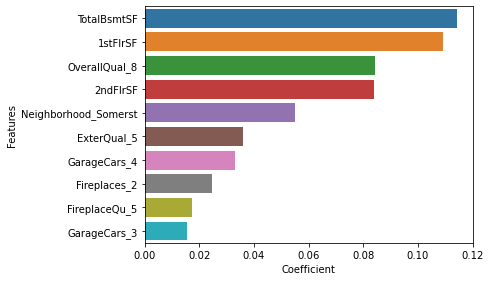

In [114]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x = 'Coefficient', palette = 'tab10', data = temp1_df)
plt.show()

The above graph displays the top 10 significant variables in predicting the price of a house.

<hr style="border: 3.5px solid #c0392b"> </hr>

# <span style="color : #c0392b"> Step 11: Lasso Regression </span>

In [115]:
# list of alphas
params = {'alpha': [0.000001,0.00001,0.0001,0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1.0, 2.0]}
# Instantiate Lasso regression
lasso = Lasso()
# Cross validation with 5 folds
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring = 'r2', 
                        cv = folds, 
                        return_train_score =True,
                        verbose = 1)
# Fitting the model with train set
lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.02,
                                   0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
                                   1.0, 2.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [116]:
# display the mean scores
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha'] <= 500]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
2       0.0001          0.926929         0.870376                1
3        0.001          0.896925         0.866201                2
1      0.00001          0.930727         0.862699                3
0     0.000001          0.930929         0.860473                4
4         0.01          0.650781         0.603578                5
5         0.02          0.459992         0.425741                6
6         0.03          0.336436         0.310733                7
7         0.04          0.208182         0.188964                8
8         0.05          0.057148         0.046968                9
9         0.06          0.000000        -0.004192               10
10        0.07          0.000000        -0.004192               10
11        0.08          0.000000        -0.004192               10
12        0.09          0.000000        -0.004192               10
13         1.0          0.000000        -0.004192               10
14         2.0          0.000000        -0.004192               10

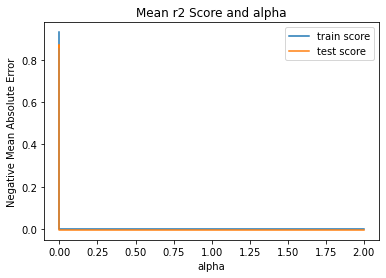

In [117]:
# plotting mean test and train scores with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Mean r2 Score and alpha")
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

In [118]:
# get the best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

## <span style="color : #f39c12"> Lasso regression with optimal alpha = 0.0001 </span>

In [119]:
# check the coefficient values with lambda = 3
alpha = 0.0001
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([-8.69000112e-03, -1.59211906e-02,  3.90379124e-03,  0.00000000e+00,
        0.00000000e+00, -4.34850418e-02,  0.00000000e+00, -0.00000000e+00,
       -9.17471024e-03, -0.00000000e+00, -1.55173153e-02,  2.56899214e-03,
        0.00000000e+00,  9.91308925e-03,  3.65883031e-02, -3.58351253e-03,
        5.75760346e-03,  6.86697533e-02, -0.00000000e+00, -9.20304498e-03,
        8.38185801e-03,  3.65680201e-02, -1.73719102e-02, -4.03269092e-03,
        0.00000000e+00,  1.55302231e-03,  2.42890197e-02, -1.12839805e-03,
       -0.00000000e+00,  3.10708951e-03,  1.15749604e-02,  1.81001601e-02,
        2.56128661e-02,  9.24876578e-02,  0.00000000e+00, -0.00000000e+00,
        9.35753762e-03,  1.88110597e-03,  0.00000000e+00, -5.01219281e-03,
        7.67525092e-03,  9.50117247e-03, -5.29874939e-04, -2.92696055e-02,
        6.67150032e-04, -0.00000000e+00, -1.74164063e-02,  2.26751581e-02,
        7.45675203e-05, -1.54952311e-02,  6.59185671e-02, -4.72193388e-02,
       -2.85648186e-02, -

## <span style="color : #f39c12"> Model evaluation Lasso Regression </span>

In [120]:
# Model performance on the train set
y_train_pred = lasso.predict(X_train)
print("R Square on training data: ", round(metrics.r2_score(y_true = y_train, y_pred = y_train_pred), 4))
# Model performance on the test set
y_test_pred = lasso.predict(X_test)
print("R Square on test data: ", round(metrics.r2_score(y_true = y_test, y_pred = y_test_pred), 4))
# Check the mean squared error and RMSE
print("Mean Squared Error: ", round(mean_squared_error(y_test, lasso.predict(X_test)), 5))
print('RMSE :', round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), 5))

R Square on training data:  0.922
R Square on test data:  0.8986
Mean Squared Error:  0.00317
RMSE : 0.0563


We have a good train score 92.2% and good test score as well 89.86%. <br>
That means what the model learnt in the train set it performed well in the test set.

In [121]:
# Put the Features and coefficienst in a dataframe
lasso_df = pd.DataFrame({'Features': X_train.columns, 'Coefficient': lasso.coef_.round(4)})
lasso_df.reset_index(drop = True, inplace = True)
lasso_df

Features  Coefficient
0               LotShape_2      -0.0087
1               LotShape_3      -0.0159
2              LotConfig_2       0.0039
3              LotConfig_3       0.0000
4               BldgType_2       0.0000
5               BldgType_3      -0.0435
6               BldgType_4       0.0000
7               BldgType_5      -0.0000
8             HouseStyle_2      -0.0092
9             HouseStyle_3      -0.0000
10            HouseStyle_4      -0.0155
11            MasVnrType_1       0.0026
12             ExterQual_3       0.0000
13             ExterQual_4       0.0099
14             ExterQual_5       0.0366
15              BsmtQual_3      -0.0036
16              BsmtQual_4       0.0058
17              BsmtQual_5       0.0687
18          BsmtExposure_1      -0.0000
19          BsmtExposure_2      -0.0092
20          BsmtExposure_3       0.0084
21          BsmtExposure_4       0.0366
22          BsmtFinType1_2      -0.0174
23          BsmtFinType1_3      -0.0040
24          BsmtFinType1_4       0.0000
25          BsmtFinType1_5       0.0016
26          BsmtFinType1_6       0.0243
27             HeatingQC_2      -0.0011
28             HeatingQC_3      -0.0000
29             HeatingQC_4       0.0031
30             HeatingQC_5       0.0116
31           KitchenQual_3       0.0181
32           KitchenQual_4       0.0256
33           KitchenQual_5       0.0925
34           FireplaceQu_1       0.0000
35           FireplaceQu_2      -0.0000
36           FireplaceQu_3       0.0094
37           FireplaceQu_4       0.0019
38           FireplaceQu_5       0.0000
39          GarageFinish_1      -0.0050
40          GarageFinish_2       0.0077
41          GarageFinish_3       0.0095
42          IsRemodelled_1      -0.0005
43           MSSubClass_50      -0.0293
44           MSSubClass_60       0.0007
45          MSSubClass_120      -0.0000
46        MSSubClass_Other      -0.0174
47             MSZoning_RL       0.0227
48             MSZoning_RM       0.0001
49    Neighborhood_CollgCr      -0.0155
50    Neighborhood_Crawfor       0.0659
51    Neighborhood_Edwards      -0.0472
52    Neighborhood_Gilbert      -0.0286
53      Neighborhood_NAmes      -0.0358
54     Neighborhood_NWAmes      -0.0503
55    Neighborhood_NridgHt       0.0109
56    Neighborhood_OldTown      -0.0486
57      Neighborhood_Other      -0.0204
58     Neighborhood_Sawyer      -0.0379
59    Neighborhood_SawyerW      -0.0128
60    Neighborhood_Somerst       0.0576
61           OverallQual_5      -0.0055
62           OverallQual_6       0.0027
63           OverallQual_7       0.0382
64           OverallQual_8       0.0901
65       OverallQual_Other       0.0325
66           OverallCond_6       0.0182
67           OverallCond_7       0.0347
68           OverallCond_8       0.0278
69       OverallCond_Other      -0.0126
70           RoofStyle_Hip      -0.0002
71         RoofStyle_Other       0.0279
72     Exterior1st_MetalSd      -0.0000
73       Exterior1st_Other       0.0066
74     Exterior1st_Plywood      -0.0082
75     Exterior1st_VinylSd       0.0192
76     Exterior1st_Wd Sdng      -0.0131
77     Exterior2nd_MetalSd       0.0073
78       Exterior2nd_Other      -0.0017
79     Exterior2nd_Plywood       0.0017
80     Exterior2nd_VinylSd      -0.0146
81     Exterior2nd_Wd Sdng       0.0181
82       Foundation_CBlock       0.0053
83        Foundation_Other       0.0048
84        Foundation_PConc       0.0053
85          BsmtFullBath_1      -0.0044
86          BsmtFullBath_2      -0.0000
87          BsmtFullBath_3       0.1206
88              FullBath_1       0.0000
89              FullBath_2      -0.0012
90              FullBath_3       0.0029
91              HalfBath_1       0.0054
92              HalfBath_2      -0.0210
93          BedroomAbvGr_1      -0.0230
94          BedroomAbvGr_2       0.0026
95          BedroomAbvGr_3       0.0000
96          BedroomAbvGr_4      -0.0018
97          BedroomAbvGr_5      -0.0165
98          BedroomAbvGr_6       0.0000
99          TotRms

## <span style="color : #f39c12"> Feature selection by Lasso regression </span>

In [122]:
# Parameters having coefficients greater than 1
lasso_df = pd.DataFrame({'Features': X_train.columns, 'Coefficient': lasso.coef_.round(4)})
lasso_df = lasso_df.loc[lasso_df['Coefficient'] != 0]
lasso_df.reset_index(drop = True, inplace = True)
lasso_df

Features  Coefficient
0               LotShape_2      -0.0087
1               LotShape_3      -0.0159
2              LotConfig_2       0.0039
3               BldgType_3      -0.0435
4             HouseStyle_2      -0.0092
5             HouseStyle_4      -0.0155
6             MasVnrType_1       0.0026
7              ExterQual_4       0.0099
8              ExterQual_5       0.0366
9               BsmtQual_3      -0.0036
10              BsmtQual_4       0.0058
11              BsmtQual_5       0.0687
12          BsmtExposure_2      -0.0092
13          BsmtExposure_3       0.0084
14          BsmtExposure_4       0.0366
15          BsmtFinType1_2      -0.0174
16          BsmtFinType1_3      -0.0040
17          BsmtFinType1_5       0.0016
18          BsmtFinType1_6       0.0243
19             HeatingQC_2      -0.0011
20             HeatingQC_4       0.0031
21             HeatingQC_5       0.0116
22           KitchenQual_3       0.0181
23           KitchenQual_4       0.0256
24           KitchenQual_5       0.0925
25           FireplaceQu_3       0.0094
26           FireplaceQu_4       0.0019
27          GarageFinish_1      -0.0050
28          GarageFinish_2       0.0077
29          GarageFinish_3       0.0095
30          IsRemodelled_1      -0.0005
31           MSSubClass_50      -0.0293
32           MSSubClass_60       0.0007
33        MSSubClass_Other      -0.0174
34             MSZoning_RL       0.0227
35             MSZoning_RM       0.0001
36    Neighborhood_CollgCr      -0.0155
37    Neighborhood_Crawfor       0.0659
38    Neighborhood_Edwards      -0.0472
39    Neighborhood_Gilbert      -0.0286
40      Neighborhood_NAmes      -0.0358
41     Neighborhood_NWAmes      -0.0503
42    Neighborhood_NridgHt       0.0109
43    Neighborhood_OldTown      -0.0486
44      Neighborhood_Other      -0.0204
45     Neighborhood_Sawyer      -0.0379
46    Neighborhood_SawyerW      -0.0128
47    Neighborhood_Somerst       0.0576
48           OverallQual_5      -0.0055
49           OverallQual_6       0.0027
50           OverallQual_7       0.0382
51           OverallQual_8       0.0901
52       OverallQual_Other       0.0325
53           OverallCond_6       0.0182
54           OverallCond_7       0.0347
55           OverallCond_8       0.0278
56       OverallCond_Other      -0.0126
57           RoofStyle_Hip      -0.0002
58         RoofStyle_Other       0.0279
59       Exterior1st_Other       0.0066
60     Exterior1st_Plywood      -0.0082
61     Exterior1st_VinylSd       0.0192
62     Exterior1st_Wd Sdng      -0.0131
63     Exterior2nd_MetalSd       0.0073
64       Exterior2nd_Other      -0.0017
65     Exterior2nd_Plywood       0.0017
66     Exterior2nd_VinylSd      -0.0146
67     Exterior2nd_Wd Sdng       0.0181
68       Foundation_CBlock       0.0053
69        Foundation_Other       0.0048
70        Foundation_PConc       0.0053
71          BsmtFullBath_1      -0.0044
72          BsmtFullBath_3       0.1206
73              FullBath_2      -0.0012
74              FullBath_3       0.0029
75              HalfBath_1       0.0054
76              HalfBath_2      -0.0210
77          BedroomAbvGr_1      -0.0230
78          BedroomAbvGr_2       0.0026
79          BedroomAbvGr_4      -0.0018
80          BedroomAbvGr_5      -0.0165
81          TotRmsAbvGrd_4       0.0015
82          TotRmsAbvGrd_6      -0.0018
83          TotRmsAbvGrd_7      -0.0007
84          TotRmsAbvGrd_8       0.0034
85          TotRmsAbvGrd_9      -0.0177
86         TotRmsAbvGrd_10       0.0091
87            Fireplaces_1       0.0084
88            Fireplaces_2       0.0228
89      GarageType_BuiltIn       0.0152
90       GarageType_Detchd      -0.0097
91    GarageType_No Garage      -0.0200
92        GarageType_Other      -0.0475
93            GarageCars_1      -0.0065
94            GarageCars_3       0.0159
95            GarageCars_4       0.0463
96          Fence_No Fence       0.0029
97             Fence_Other      -0.0009
98    SaleCondition_Normal       0.0272
99     SaleConditi

In [123]:
# Minus one as we have constant present in lasso_params_df
len(lasso_df)-1

115

In [124]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot
lasso_coeff_dict = dict(pd.Series(lasso.coef_.round(4), index = X_train.columns))
lasso_coeff_dict

{'LotShape_2': -0.0087,
 'LotShape_3': -0.0159,
 'LotConfig_2': 0.0039,
 'LotConfig_3': 0.0,
 'BldgType_2': 0.0,
 'BldgType_3': -0.0435,
 'BldgType_4': 0.0,
 'BldgType_5': -0.0,
 'HouseStyle_2': -0.0092,
 'HouseStyle_3': -0.0,
 'HouseStyle_4': -0.0155,
 'MasVnrType_1': 0.0026,
 'ExterQual_3': 0.0,
 'ExterQual_4': 0.0099,
 'ExterQual_5': 0.0366,
 'BsmtQual_3': -0.0036,
 'BsmtQual_4': 0.0058,
 'BsmtQual_5': 0.0687,
 'BsmtExposure_1': -0.0,
 'BsmtExposure_2': -0.0092,
 'BsmtExposure_3': 0.0084,
 'BsmtExposure_4': 0.0366,
 'BsmtFinType1_2': -0.0174,
 'BsmtFinType1_3': -0.004,
 'BsmtFinType1_4': 0.0,
 'BsmtFinType1_5': 0.0016,
 'BsmtFinType1_6': 0.0243,
 'HeatingQC_2': -0.0011,
 'HeatingQC_3': -0.0,
 'HeatingQC_4': 0.0031,
 'HeatingQC_5': 0.0116,
 'KitchenQual_3': 0.0181,
 'KitchenQual_4': 0.0256,
 'KitchenQual_5': 0.0925,
 'FireplaceQu_1': 0.0,
 'FireplaceQu_2': -0.0,
 'FireplaceQu_3': 0.0094,
 'FireplaceQu_4': 0.0019,
 'FireplaceQu_5': 0.0,
 'GarageFinish_1': -0.005,
 'GarageFinish_2': 0.

In [125]:
# Do an RFE to minimise the features to 15
X_train_lasso = X_train[lasso_df.Features]
lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE
rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train_lasso, y_train)

In [126]:
# Method to get the coefficient values
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot
temp1_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), 
                        columns = ['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop = True, inplace = True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by = ['Coefficient'], ascending = False)
# temp1_df = temp1_df.head()
temp1_df

Features  rfe_support  rfe_ranking  Coefficient
20           TotalBsmtSF         True            1       0.1930
13        BsmtFullBath_3         True            1       0.1206
3          KitchenQual_5         True            1       0.0925
11         OverallQual_8         True            1       0.0901
8   Neighborhood_Crawfor         True            1       0.0659
9   Neighborhood_Somerst         True            1       0.0576
18               LotArea         True            1       0.0510
22              2ndFlrSF         True            1       0.0498
23            GarageArea         True            1       0.0495
16          GarageCars_4         True            1       0.0463
10         OverallQual_7         True            1       0.0382
2            ExterQual_5         True            1       0.0366
12     OverallQual_Other         True            1       0.0325
21              1stFlrSF         True            1       0.0172
6         GarageFinish_3         True            1       0.0095
5         GarageFinish_2         True            1       0.0077
4         GarageFinish_1         True            1      -0.0050
1           HouseStyle_2         True            1      -0.0092
17   SaleCondition_Other         True            1      -0.0174
14  GarageType_No Garage         True            1      -0.0200
24     BuiltOrRemodelAge         True            1      -0.0253
7          MSSubClass_50         True            1      -0.0293
0             BldgType_3         True            1      -0.0435
15      GarageType_Other         True            1      -0.0475
19             BsmtUnfSF         True            1      -0.0632

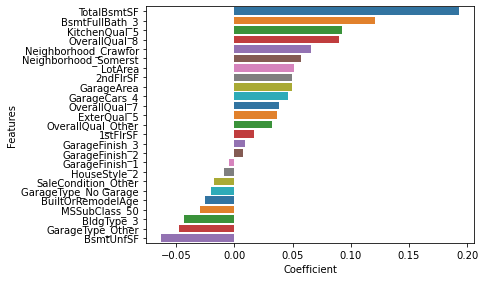

In [127]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x = 'Coefficient', palette = 'tab10', data = temp1_df)
plt.show()

The above graph displays the top 10 significant variables in predicting the price of a house.

## <span style="color : #f39c12"> Observation for Ridge and Lasso </span>
The optimal lambda value in case of Ridge and Lasso is as below:<br>
Ridge - 3 <br>
Lasso - 0.0001

The Mean Squared error in case of Ridge and Lasso are: <br>
Ridge - 0.00323 <br>
Lasso - 0.00317

The Mean Squared Error of Lasso is slightly lower than that of Ridge.

Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.

## <span style="color : #f39c12"> Hence the equation: 
Y = C + 0.193(TotalBsmtSF) + 0.1206(BsmtFullBath_3) + 0.0925(KitchenQual_5) + 0.0901(OverallQual_8) + 
0.0659(Neighborhood_Crawfor) + 0.0576(Neighborhood_Crawfor) + 0.0510(LotArea) + 0.0498(2ndFlrSF) + 
0.0495(GarageArea) + 0.0463(GarageCars_4) + 0.0382(OverallQual_7) + 0.0366(ExterQual_5) + 0.0325(OverallQual_Other) - 0.0172(1stFlrSF) - 0.0095(GarageFinish_3) + 0.0077(GarageFinish_2) - 0.0050(GarageFinish_1) - 0.0092(HouseStyle_2) - 0.0174(SaleCondition_Other) - 0.0200(GarageType_No Garage) - 0.0253(BuiltOrRemodelAge) - 0.0293(MSSubClass_50) - 0.0435(BldgType_3) - 0.0475(GarageType_Other) - 0.0632(BsmtUnfSF) + Error term(RSS + alpha * (sum of absolute value of coefficients)        

# <span style="color : #c0392b"> INFERENCE </span>
Keep a check on these predictors affecting the price of the house. <br>
The higher values of positive coeeficients suggest a high sale value. <br>
Some of those features are:- <br>
Feature	Description <br>
TotalBsmtSF	Total square feet of basement area <br>
BsmtFullBath_3	Basement full bathrooms <br>
KitchenQual_5	Kitchen quality <br>
OverallQual_8	Rates the overall material and finish of the house <br>
Neighborhood_Crawfor Physical locations within Ames city limits <br>

The higher values of negative coeeficients suggest a decrease in sale value. <br>
Some of those features are:- <br>
Feature	Description <br>
BsmtUnfSF	Unfinished square feet of basement area <br>
GarageType_Other Garage location <br>
BldgType_3 Type of dwelling <br>
When the market value of the property is lower than the Predicted Sale Price, its the time to buy.

<hr style="border: 3.5px solid #c0392b"> </hr>

# <span style="color : #c0392b"> Subjective Questions </span>

## <span style="color : #f39c12"> Question 1 </span>
What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
What will be the most important predictor variables after the change is implemented?

## <span style="color : #f39c12"> Ridge</span>

In [128]:
# check the coefficient values with lambda = 3
alpha_2 = 6
ridge_2 = Ridge(alpha = alpha_2)
ridge_2.fit(X_train, y_train)

# Model performance on the train set
y_train_pred_2 = ridge_2.predict(X_train)
print("R Square on training data: ", round(metrics.r2_score(y_true = y_train, y_pred = y_train_pred_2), 4))
# Model performance on the test set
y_test_pred_2 = ridge_2.predict(X_test)
print("R Square on test data: ", round(metrics.r2_score(y_true = y_test, y_pred = y_test_pred_2), 4))
# Check the mean squared error and RMSE
print("Mean Squared Error: ", round(mean_squared_error(y_test, ridge_2.predict(X_test)), 5))
print('RMSE :', round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_2)), 5))

# Put the Features and coefficienst in a dataframe
ridge_df_2 = pd.DataFrame({'Features': X_train.columns, 'Coefficient': ridge_2.coef_.round(4)})
ridge_df_2.reset_index(drop = True, inplace = True)

# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot
ridge_coeff_dict_2 = dict(pd.Series(ridge_2.coef_.round(4), index = X_train.columns))

# Do an RFE to minimise the features to 25
X_train_ridge_2 = X_train[ridge_df_2.Features]

lm_2 = LinearRegression()
lm_2.fit(X_train_ridge_2, y_train)

# running RFE
rfe_ridge_2 = RFE(lm, 25)            
rfe_ridge_2 = rfe_ridge_2.fit(X_train_ridge_2, y_train)

# Method to get the coefficient values
def find(x):
    return ridge_coeff_dict_2[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot
temp2_df = pd.DataFrame(list(zip( X_train_ridge_2.columns, rfe_ridge.support_, rfe_ridge.ranking_)), 
                        columns = ['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop = True, inplace = True)
temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by = ['Coefficient'], ascending = False)
temp2_df = temp2_df.head(10)
temp2_df

R Square on training data:  0.9136
R Square on test data:  0.8956
Mean Squared Error:  0.00326
RMSE : 0.05714


Features  rfe_support  rfe_ranking  Coefficient
23              1stFlrSF         True            1       0.0957
22           TotalBsmtSF         True            1       0.0927
11         OverallQual_8         True            1       0.0782
24              2ndFlrSF         True            1       0.0667
10  Neighborhood_Somerst         True            1       0.0518
1            ExterQual_5         True            1       0.0295
14          Fireplaces_2         True            1       0.0266
20          GarageCars_4         True            1       0.0226
19          GarageCars_3         True            1       0.0214
9         GarageFinish_3         True            1       0.0160

## <span style="color : #f39c12"> Lasso </span>

In [129]:
# check the coefficient values with lambda = 3
alpha_3 = 0.0002
lasso_3 = Lasso(alpha = alpha_3)
lasso_3.fit(X_train, y_train)

# Model performance on the train set
y_train_pred_3 = lasso_3.predict(X_train)
print("R Square on training data: ", round(metrics.r2_score(y_true = y_train, y_pred = y_train_pred_3), 4))
# Model performance on the test set
y_test_pred_3 = lasso_3.predict(X_test)
print("R Square on test data: ", round(metrics.r2_score(y_true = y_test, y_pred = y_test_pred_3), 4))
# Check the mean squared error and RMSE
print("Mean Squared Error: ", round(mean_squared_error(y_test, lasso_3.predict(X_test)), 5))
print('RMSE :', round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_3)), 5))

# Put the Features and coefficienst in a dataframe
lasso_df_3 = pd.DataFrame({'Features': X_train.columns, 'Coefficient': lasso_3.coef_.round(4)})
lasso_df_3 = lasso_df_3.loc[lasso_df_3['Coefficient'] != 0]
lasso_df_3.reset_index(drop = True, inplace = True)

# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot
lasso_coeff_dict_3 = dict(pd.Series(lasso_3.coef_.round(4), index = X_train.columns))

# Do an RFE to minimise the features to 15
X_train_lasso_3 = X_train[lasso_df_3.Features]
lm_3 = LinearRegression()
lm_3.fit(X_train_lasso_3, y_train)

# running RFE
rfe_lasso_3 = RFE(lm, 25)            
rfe_lasso_3 = rfe_lasso_3.fit(X_train_lasso_3, y_train)

# Method to get the coefficient values
def find(x):
    return lasso_coeff_dict_3[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot
temp3_df = pd.DataFrame(list(zip( X_train_lasso_3.columns, rfe_lasso_3.support_, rfe_lasso_3.ranking_)), 
                        columns = ['Features', 'rfe_support', 'rfe_ranking'])
temp3_df = temp3_df.loc[temp3_df['rfe_support'] == True]
temp3_df.reset_index(drop = True, inplace = True)
temp3_df['Coefficient'] = temp3_df['Features'].apply(find)
temp3_df = temp3_df.sort_values(by = ['Coefficient'], ascending = False)
temp3_df

R Square on training data:  0.9167
R Square on test data:  0.8989
Mean Squared Error:  0.00316
RMSE : 0.05622


Features  rfe_support  rfe_ranking  Coefficient
22             GrLivArea         True            1       0.3257
20           TotalBsmtSF         True            1       0.1553
12         OverallQual_8         True            1       0.0868
4          KitchenQual_5         True            1       0.0807
8   Neighborhood_Crawfor         True            1       0.0733
10  Neighborhood_Somerst         True            1       0.0691
2             BsmtQual_5         True            1       0.0679
23            GarageArea         True            1       0.0552
19            BsmtFinSF1         True            1       0.0509
18               LotArea         True            1       0.0457
1            ExterQual_5         True            1       0.0389
3         BsmtExposure_4         True            1       0.0379
11         OverallQual_7         True            1       0.0354
21              2ndFlrSF         True            1       0.0208
13        BsmtFullBath_3         True            1       0.0167
16          GarageCars_4         True            1       0.0095
7         GarageFinish_3         True            1       0.0090
6         GarageFinish_2         True            1       0.0065
5         GarageFinish_1         True            1      -0.0068
17   SaleCondition_Other         True            1      -0.0089
14  GarageType_No Garage         True            1      -0.0163
24     BuiltOrRemodelAge         True            1      -0.0285
0             BldgType_3         True            1      -0.0366
9   Neighborhood_OldTown         True            1      -0.0374
15      GarageType_Other         True            1      -0.0469

<hr style="border: 3.5px solid #f39c12"> </hr>

## <span style="color : #f39c12"> Question 3 </span>
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. <br>
You will now have to create another model excluding the five most important predictor variables. <br>
Which are the five most important predictor variables now?

Top 5 important variables in current lasso model <br>
TotalBsmtSF, BsmtFullBath_3, KitchenQual_5, OverallQual_8, Neighborhood_Crawfor

In [130]:
# Checking shape of X_train
X_train.shape

(714, 139)

In [131]:
# Dropping top 5 columns in Lasso
X_train_Q3 = X_train.drop(['TotalBsmtSF', 'BsmtFullBath_3', 'KitchenQual_5', 'OverallQual_8', 'Neighborhood_Crawfor'], 
                          axis = 1)

In [132]:
# Checking shape post dropping top 5 columns
X_train_Q3.shape

(714, 134)

In [133]:
# list of alphas
params_Q3 = {'alpha': [0.000001,0.00001,0.0001,0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1.0, 2.0]}
# Instantiate Lasso regression
lasso_Q3 = Lasso()
# Cross validation with 5 folds
folds = 5
lasso_model_cv_Q3 = GridSearchCV(estimator = lasso_Q3, 
                        param_grid = params_Q3, 
                        scoring = 'r2', 
                        cv = folds, 
                        return_train_score = True,
                        verbose = 1)
# Fitting the model with train set
lasso_model_cv_Q3.fit(X_train_Q3, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.02,
                                   0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
                                   1.0, 2.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [134]:
# display the mean scores
lasso_cv_results_Q3 = pd.DataFrame(lasso_model_cv_Q3.cv_results_)
lasso_cv_results_Q3 = lasso_cv_results_Q3[lasso_cv_results_Q3['param_alpha'] <= 500]
lasso_cv_results_Q3[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
2       0.0001          0.913827         0.853376                1
3        0.001          0.879160         0.846221                2
1      0.00001          0.918014         0.844866                3
0     0.000001          0.918223         0.843051                4
4         0.01          0.637525         0.593585                5
5         0.02          0.459450         0.425442                6
6         0.03          0.336436         0.310733                7
7         0.04          0.208182         0.188964                8
8         0.05          0.057148         0.046968                9
9         0.06          0.000000        -0.004192               10
10        0.07          0.000000        -0.004192               10
11        0.08          0.000000        -0.004192               10
12        0.09          0.000000        -0.004192               10
13         1.0          0.000000        -0.004192               10
14         2.0          0.000000        -0.004192               10

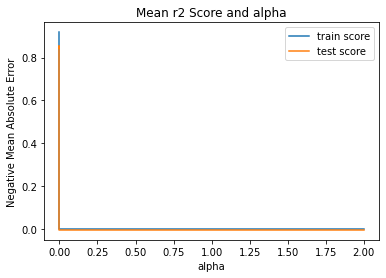

In [135]:
# plotting mean test and train scores with alpha 
lasso_cv_results_Q3['param_alpha'] = lasso_cv_results_Q3['param_alpha'].astype('int32')

# plotting
plt.plot(lasso_cv_results_Q3['param_alpha'], lasso_cv_results_Q3['mean_train_score'])
plt.plot(lasso_cv_results_Q3['param_alpha'], lasso_cv_results_Q3['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Mean r2 Score and alpha")
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

In [136]:
# get the best estimator for lambda
lasso_model_cv_Q3.best_estimator_

Lasso(alpha=0.0001)

## <span style="color : #f39c12"> Lasso regression with optimal alpha = 0.0001 </span>

In [137]:
# check the coefficient values with lambda = 3
alpha_Q3 = 0.0001
lasso_Q3_1 = Lasso(alpha = alpha_Q3)
lasso_Q3_1.fit(X_train_Q3, y_train)
lasso_Q3_1.coef_

array([-0.01422435, -0.02107106,  0.00642564,  0.00407816,  0.        ,
       -0.02616437,  0.        , -0.        , -0.00856028,  0.        ,
       -0.        ,  0.        ,  0.02539662,  0.0495741 ,  0.05696941,
       -0.00209226,  0.01686093,  0.10147967, -0.        , -0.01061929,
        0.0059035 ,  0.04493367, -0.0049568 ,  0.        ,  0.00792942,
        0.00410376,  0.02983918, -0.00247998, -0.0020916 ,  0.        ,
        0.00893099, -0.02128007, -0.01660381,  0.        , -0.00701838,
        0.00326815,  0.00512085,  0.01149787, -0.01279643,  0.00471832,
        0.00986403, -0.00479809, -0.03865312, -0.0165603 , -0.        ,
       -0.02486389,  0.03783874, -0.        , -0.04328712, -0.07539775,
       -0.05376425, -0.06606499, -0.07250381, -0.        , -0.06152814,
       -0.03951024, -0.06472194, -0.03994268,  0.04664783, -0.02890541,
       -0.03227393, -0.00954053,  0.        ,  0.01901044,  0.03600392,
        0.03407953, -0.01210761,  0.        ,  0.0258381 ,  0.  

## <span style="color : #f39c12"> Model evaluation Lasso Regression </span>

In [138]:
X_test_Q3 = X_test[X_train_Q3.columns]
# Model performance on the train set
y_train_pred_Q3 = lasso_Q3_1.predict(X_train_Q3)
print("R Square on training data: ", round(metrics.r2_score(y_true = y_train, y_pred = y_train_pred_Q3), 4))
# Model performance on the test set
y_test_pred_Q3 = lasso_Q3_1.predict(X_test_Q3)
print("R Square on test data: ", round(metrics.r2_score(y_true = y_test, y_pred = y_test_pred_Q3), 4))
# Check the mean squared error and RMSE
print("Mean Squared Error: ", round(mean_squared_error(y_test, lasso_Q3_1.predict(X_test_Q3)), 5))
print('RMSE :', round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_Q3)), 5))

R Square on training data:  0.9084
R Square on test data:  0.879
Mean Squared Error:  0.00378
RMSE : 0.0615


We have a good train score 90.84% and good test score as well 87.9%. <br>
That means what the model learnt in the train set it performed well in the test set.

In [139]:
# Put the Features and coefficienst in a dataframe
lasso_df_Q3 = pd.DataFrame({'Features': X_train_Q3.columns, 'Coefficient': lasso_Q3_1.coef_.round(4)})
lasso_df_Q3.reset_index(drop = True, inplace = True)
lasso_df_Q3

Features  Coefficient
0               LotShape_2      -0.0142
1               LotShape_3      -0.0211
2              LotConfig_2       0.0064
3              LotConfig_3       0.0041
4               BldgType_2       0.0000
5               BldgType_3      -0.0262
6               BldgType_4       0.0000
7               BldgType_5      -0.0000
8             HouseStyle_2      -0.0086
9             HouseStyle_3       0.0000
10            HouseStyle_4      -0.0000
11            MasVnrType_1       0.0000
12             ExterQual_3       0.0254
13             ExterQual_4       0.0496
14             ExterQual_5       0.0570
15              BsmtQual_3      -0.0021
16              BsmtQual_4       0.0169
17              BsmtQual_5       0.1015
18          BsmtExposure_1      -0.0000
19          BsmtExposure_2      -0.0106
20          BsmtExposure_3       0.0059
21          BsmtExposure_4       0.0449
22          BsmtFinType1_2      -0.0050
23          BsmtFinType1_3       0.0000
24          BsmtFinType1_4       0.0079
25          BsmtFinType1_5       0.0041
26          BsmtFinType1_6       0.0298
27             HeatingQC_2      -0.0025
28             HeatingQC_3      -0.0021
29             HeatingQC_4       0.0000
30             HeatingQC_5       0.0089
31           KitchenQual_3      -0.0213
32           KitchenQual_4      -0.0166
33           FireplaceQu_1       0.0000
34           FireplaceQu_2      -0.0070
35           FireplaceQu_3       0.0033
36           FireplaceQu_4       0.0051
37           FireplaceQu_5       0.0115
38          GarageFinish_1      -0.0128
39          GarageFinish_2       0.0047
40          GarageFinish_3       0.0099
41          IsRemodelled_1      -0.0048
42           MSSubClass_50      -0.0387
43           MSSubClass_60      -0.0166
44          MSSubClass_120      -0.0000
45        MSSubClass_Other      -0.0249
46             MSZoning_RL       0.0378
47             MSZoning_RM      -0.0000
48    Neighborhood_CollgCr      -0.0433
49    Neighborhood_Edwards      -0.0754
50    Neighborhood_Gilbert      -0.0538
51      Neighborhood_NAmes      -0.0661
52     Neighborhood_NWAmes      -0.0725
53    Neighborhood_NridgHt      -0.0000
54    Neighborhood_OldTown      -0.0615
55      Neighborhood_Other      -0.0395
56     Neighborhood_Sawyer      -0.0647
57    Neighborhood_SawyerW      -0.0399
58    Neighborhood_Somerst       0.0466
59           OverallQual_5      -0.0289
60           OverallQual_6      -0.0323
61           OverallQual_7      -0.0095
62       OverallQual_Other       0.0000
63           OverallCond_6       0.0190
64           OverallCond_7       0.0360
65           OverallCond_8       0.0341
66       OverallCond_Other      -0.0121
67           RoofStyle_Hip       0.0000
68         RoofStyle_Other       0.0258
69     Exterior1st_MetalSd       0.0000
70       Exterior1st_Other       0.0082
71     Exterior1st_Plywood      -0.0089
72     Exterior1st_VinylSd       0.0279
73     Exterior1st_Wd Sdng      -0.0176
74     Exterior2nd_MetalSd       0.0015
75       Exterior2nd_Other       0.0037
76     Exterior2nd_Plywood       0.0000
77     Exterior2nd_VinylSd      -0.0293
78     Exterior2nd_Wd Sdng       0.0248
79       Foundation_CBlock       0.0058
80        Foundation_Other       0.0000
81        Foundation_PConc       0.0087
82          BsmtFullBath_1      -0.0012
83          BsmtFullBath_2      -0.0000
84              FullBath_1       0.0060
85              FullBath_2      -0.0000
86              FullBath_3       0.0176
87              HalfBath_1       0.0083
88              HalfBath_2      -0.0373
89          BedroomAbvGr_1      -0.0199
90          BedroomAbvGr_2       0.0025
91          BedroomAbvGr_3       0.0000
92          BedroomAbvGr_4      -0.0041
93          BedroomAbvGr_5      -0.0470
94          BedroomAbvGr_6       0.0000
95          TotRmsAbvGrd_4       0.0022
96          TotRmsAbvGrd_5       0.0016
97          TotRmsAbvGrd_6      -0.0007
98          TotRmsAbvGrd_7      -0.0040
99          TotRms

## <span style="color : #f39c12"> Feature selection by Lasso regression </span>

In [140]:
# Parameters having coefficients greater than 1
lasso_df_Q3 = pd.DataFrame({'Features': X_train_Q3.columns, 'Coefficient': lasso_Q3_1.coef_.round(4)})
lasso_df_Q3 = lasso_df_Q3.loc[lasso_df_Q3['Coefficient'] != 0]
lasso_df_Q3.reset_index(drop = True, inplace = True)
lasso_df_Q3

Features  Coefficient
0               LotShape_2      -0.0142
1               LotShape_3      -0.0211
2              LotConfig_2       0.0064
3              LotConfig_3       0.0041
4               BldgType_3      -0.0262
5             HouseStyle_2      -0.0086
6              ExterQual_3       0.0254
7              ExterQual_4       0.0496
8              ExterQual_5       0.0570
9               BsmtQual_3      -0.0021
10              BsmtQual_4       0.0169
11              BsmtQual_5       0.1015
12          BsmtExposure_2      -0.0106
13          BsmtExposure_3       0.0059
14          BsmtExposure_4       0.0449
15          BsmtFinType1_2      -0.0050
16          BsmtFinType1_4       0.0079
17          BsmtFinType1_5       0.0041
18          BsmtFinType1_6       0.0298
19             HeatingQC_2      -0.0025
20             HeatingQC_3      -0.0021
21             HeatingQC_5       0.0089
22           KitchenQual_3      -0.0213
23           KitchenQual_4      -0.0166
24           FireplaceQu_2      -0.0070
25           FireplaceQu_3       0.0033
26           FireplaceQu_4       0.0051
27           FireplaceQu_5       0.0115
28          GarageFinish_1      -0.0128
29          GarageFinish_2       0.0047
30          GarageFinish_3       0.0099
31          IsRemodelled_1      -0.0048
32           MSSubClass_50      -0.0387
33           MSSubClass_60      -0.0166
34        MSSubClass_Other      -0.0249
35             MSZoning_RL       0.0378
36    Neighborhood_CollgCr      -0.0433
37    Neighborhood_Edwards      -0.0754
38    Neighborhood_Gilbert      -0.0538
39      Neighborhood_NAmes      -0.0661
40     Neighborhood_NWAmes      -0.0725
41    Neighborhood_OldTown      -0.0615
42      Neighborhood_Other      -0.0395
43     Neighborhood_Sawyer      -0.0647
44    Neighborhood_SawyerW      -0.0399
45    Neighborhood_Somerst       0.0466
46           OverallQual_5      -0.0289
47           OverallQual_6      -0.0323
48           OverallQual_7      -0.0095
49           OverallCond_6       0.0190
50           OverallCond_7       0.0360
51           OverallCond_8       0.0341
52       OverallCond_Other      -0.0121
53         RoofStyle_Other       0.0258
54       Exterior1st_Other       0.0082
55     Exterior1st_Plywood      -0.0089
56     Exterior1st_VinylSd       0.0279
57     Exterior1st_Wd Sdng      -0.0176
58     Exterior2nd_MetalSd       0.0015
59       Exterior2nd_Other       0.0037
60     Exterior2nd_VinylSd      -0.0293
61     Exterior2nd_Wd Sdng       0.0248
62       Foundation_CBlock       0.0058
63        Foundation_PConc       0.0087
64          BsmtFullBath_1      -0.0012
65              FullBath_1       0.0060
66              FullBath_3       0.0176
67              HalfBath_1       0.0083
68              HalfBath_2      -0.0373
69          BedroomAbvGr_1      -0.0199
70          BedroomAbvGr_2       0.0025
71          BedroomAbvGr_4      -0.0041
72          BedroomAbvGr_5      -0.0470
73          TotRmsAbvGrd_4       0.0022
74          TotRmsAbvGrd_5       0.0016
75          TotRmsAbvGrd_6      -0.0007
76          TotRmsAbvGrd_7      -0.0040
77          TotRmsAbvGrd_9      -0.0207
78         TotRmsAbvGrd_10       0.0118
79            Fireplaces_1       0.0115
80            Fireplaces_2       0.0325
81      GarageType_BuiltIn       0.0083
82       GarageType_Detchd      -0.0124
83    GarageType_No Garage      -0.0282
84        GarageType_Other      -0.0615
85            GarageCars_1      -0.0015
86            GarageCars_3       0.0319
87            GarageCars_4       0.0366
88          Fence_No Fence       0.0035
89             Fence_Other      -0.0022
90    SaleCondition_Normal       0.0218
91     SaleCondition_Other      -0.0140
92   SaleCondition_Partial       0.0264
93             LotFrontage       0.0136
94                 LotArea       0.0481
95              MasVnrArea       0.0138
96              BsmtFinSF1       0.0857
97               BsmtUnfSF       0.0052
98                1stFlrSF       0.0485
99                

In [141]:
# Minus one as we have constant present in lasso_params_df
len(lasso_df_Q3)-1

106

In [142]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot
lasso_coeff_dict_Q3 = dict(pd.Series(lasso_Q3_1.coef_.round(4), index = X_train_Q3.columns))
lasso_coeff_dict_Q3

{'LotShape_2': -0.0142,
 'LotShape_3': -0.0211,
 'LotConfig_2': 0.0064,
 'LotConfig_3': 0.0041,
 'BldgType_2': 0.0,
 'BldgType_3': -0.0262,
 'BldgType_4': 0.0,
 'BldgType_5': -0.0,
 'HouseStyle_2': -0.0086,
 'HouseStyle_3': 0.0,
 'HouseStyle_4': -0.0,
 'MasVnrType_1': 0.0,
 'ExterQual_3': 0.0254,
 'ExterQual_4': 0.0496,
 'ExterQual_5': 0.057,
 'BsmtQual_3': -0.0021,
 'BsmtQual_4': 0.0169,
 'BsmtQual_5': 0.1015,
 'BsmtExposure_1': -0.0,
 'BsmtExposure_2': -0.0106,
 'BsmtExposure_3': 0.0059,
 'BsmtExposure_4': 0.0449,
 'BsmtFinType1_2': -0.005,
 'BsmtFinType1_3': 0.0,
 'BsmtFinType1_4': 0.0079,
 'BsmtFinType1_5': 0.0041,
 'BsmtFinType1_6': 0.0298,
 'HeatingQC_2': -0.0025,
 'HeatingQC_3': -0.0021,
 'HeatingQC_4': 0.0,
 'HeatingQC_5': 0.0089,
 'KitchenQual_3': -0.0213,
 'KitchenQual_4': -0.0166,
 'FireplaceQu_1': 0.0,
 'FireplaceQu_2': -0.007,
 'FireplaceQu_3': 0.0033,
 'FireplaceQu_4': 0.0051,
 'FireplaceQu_5': 0.0115,
 'GarageFinish_1': -0.0128,
 'GarageFinish_2': 0.0047,
 'GarageFinish_

In [143]:
# Do an RFE to minimise the features to 15
X_train_lasso_Q3 = X_train_Q3[lasso_df_Q3.Features]
lm_Q3 = LinearRegression()
lm_Q3.fit(X_train_lasso_Q3, y_train)

# running RFE
rfe_Q3 = RFE(lm, 25)            
rfe_Q3 = rfe_Q3.fit(X_train_lasso_Q3, y_train)

In [144]:
# Method to get the coefficient values
def find(x):
    return lasso_coeff_dict_Q3[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot
temp_Q3_df = pd.DataFrame(list(zip( X_train_lasso_Q3.columns, rfe_Q3.support_, rfe_Q3.ranking_)), 
                        columns = ['Features', 'rfe_support', 'rfe_ranking'])
temp_Q3_df = temp_Q3_df.loc[temp_Q3_df['rfe_support'] == True]
temp_Q3_df.reset_index(drop = True, inplace = True)
temp_Q3_df['Coefficient'] = temp_Q3_df['Features'].apply(find)
temp_Q3_df = temp_Q3_df.sort_values(by = ['Coefficient'], ascending = False)
# temp1_df = temp1_df.head()
temp_Q3_df

Features  rfe_support  rfe_ranking  Coefficient
22             GrLivArea         True            1       0.4067
3             BsmtQual_5         True            1       0.1015
19            BsmtFinSF1         True            1       0.0857
23            GarageArea         True            1       0.0632
2            ExterQual_5         True            1       0.0570
1            ExterQual_4         True            1       0.0496
20              1stFlrSF         True            1       0.0485
18               LotArea         True            1       0.0481
12  Neighborhood_Somerst         True            1       0.0466
7            MSZoning_RL         True            1       0.0378
17          GarageCars_4         True            1       0.0366
6         GarageFinish_3         True            1       0.0099
5         GarageFinish_2         True            1       0.0047
21              2ndFlrSF         True            1       0.0031
4         GarageFinish_1         True            1      -0.0128
0             BldgType_3         True            1      -0.0262
15  GarageType_No Garage         True            1      -0.0282
24     BuiltOrRemodelAge         True            1      -0.0316
13            HalfBath_2         True            1      -0.0373
14        BedroomAbvGr_5         True            1      -0.0470
16      GarageType_Other         True            1      -0.0615
10  Neighborhood_OldTown         True            1      -0.0615
11   Neighborhood_Sawyer         True            1      -0.0647
9    Neighborhood_NWAmes         True            1      -0.0725
8   Neighborhood_Edwards         True            1      -0.0754

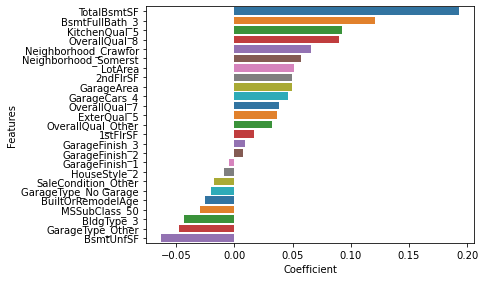

In [145]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x = 'Coefficient', palette = 'tab10', data = temp1_df)
plt.show()

The above graph displays the top 10 significant variables in predicting the price of a house.